In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
import keras  
import numpy as np

Using TensorFlow backend.


# Street View House Numbers Classification
The Street View House Numbers (SVHN) dataset is one of the most popular benchmarks for object recognition tasks in academic papers. The images were obtained from house numbers in Google Street View images, are hosted by Stanford University and are very similar in philosophy with the MNIST dataset. However, the original purpose of this dataset is to solve a harder problem: that of recognizing digits and numbers in natural scene images.

The data of the Street View House Numbers dataset, which can originally be found here are originally in .mat, i.e. files which can be best processed with MATLAB; thus, some preprocessing is required (see section 2). It is important to note that the data are divided into two formats and in this particular kernel we are going to use Format 2:

Format 1: The original, variable-resolution colored house-number images with character level bounding boxes.

Format 2: The cropped digits (32x32 pixels) which follow the philosophy of the MNIST dataset more closely, but also contain some distracting digits to the sides of the digit of interest.

In [2]:
import h5py

df=h5py.File('/Users/sourav/Downloads/SVHN_single_grey1.h5' , 'r')


In [3]:
df.keys() 

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_train=df['X_train'][:]
y_train=df['y_train'][:]
X_test=df['X_test'][:]
y_test=df['y_test'][:]
X_val=df['X_val'][:]
y_val=df['y_val'][:]


In [5]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


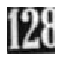

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


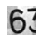

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


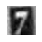

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


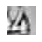

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


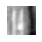

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


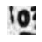

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


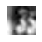

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


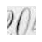

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


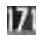

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


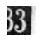

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
  plt.show()
  print('label for each of the above image:%s'%(y_train[0:10]))


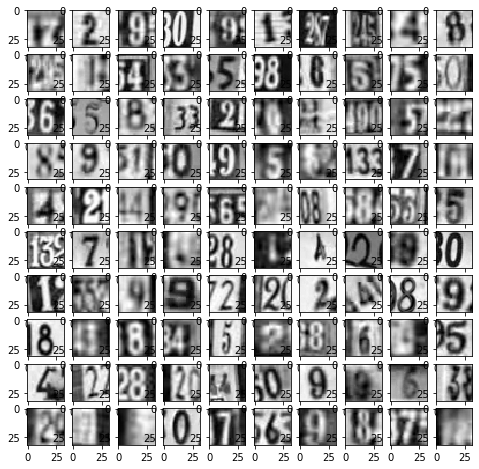

In [7]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

In [8]:
X_train= X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)


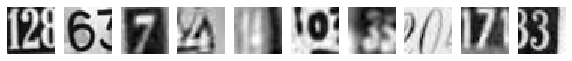

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [10]:
X_val= X_val.reshape(X_val.shape[0],1024)

In [11]:
y_train.shape

(42000,)

# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_val, y_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

#Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [12]:
# #normalize inputs from 0-255 to 0-1
X_train= X_train.astype('float32')/255.0
X_test =X_test.astype('float32')/255.0
X_val=X_val.astype('float32')/255.0
print('Training set',X_train.shape,y_train.shape)
print('Testset',X_test.shape,y_test.shape)
print('Validationset',X_val.shape,y_val.shape)

Training set (42000, 1024) (42000,)
Testset (18000, 1024) (18000,)
Validationset (60000, 1024) (60000,)


In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)


In [14]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [15]:
x_tr = []
for i in range (42000):
  x_tr.append(X_train[i,:].flatten())
x_te=[]
for i in range(18000):
  x_te.append(X_test[i,:].flatten())
x_va=[]
for i in range(60000):
  x_va.append(X_val[i,:].flatten())


In [16]:
x_tr =x_tr[:2000]
x_te= x_te[:2000]
x_va= x_va[:2000]

y_tr= y_train[0:2000]
y_te =y_test[0:2000]
y_va =y_val[0:2000]


In [17]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))
print(len(x_va))
print(len(y_va))

2000
2000
2000
2000
2000
2000


In [18]:
a=[]
j=[]
def knnvalue(k):
  from sklearn.neighbors import KNeighborsClassifier
  NHH = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  NHH.fit(x_tr,y_tr)
  predicted_labels= NHH.predict(x_va)
  from sklearn.metrics import accuracy_score
  ascore= accuracy_score(y_va,predicted_labels)
  MSE= 1-ascore
  a.append(MSE)
  j.append(k)
  print(ascore)

In [19]:
for i in range(1,30,2):
  knnvalue(i)

0.316
0.1875
0.1125
0.075
0.0485
0.0335
0.0225
0.0155
0.012
0.0095
0.007
0.0045
0.0025
0.001
0.0015


In [20]:

# for the above run the KNN value is the lowest for K=11
from sklearn.neighbors import KNeighborsClassifier
NHH = KNeighborsClassifier(n_neighbors=1,weights='uniform')
NHH.fit(x_tr,y_tr)
pred= NHH.predict(x_te)

In [21]:
# Finding out the confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(pred,y_te))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31       217
           1       0.49      0.38      0.42       239
           2       0.26      0.24      0.25       207
           3       0.22      0.21      0.21       194
           4       0.43      0.41      0.42       214
           5       0.25      0.27      0.26       196
           6       0.24      0.24      0.24       201
           7       0.40      0.44      0.42       188
           8       0.16      0.21      0.18       145
           9       0.23      0.23      0.23       199

   micro avg       0.30      0.30      0.30      2000
   macro avg       0.30      0.29      0.29      2000
weighted avg       0.31      0.30      0.30      2000
 samples avg       0.30      0.30      0.30      2000



# Artificial Neural Network Classifier-Layers Used


# Dense Layers
For the dense layer, I used a Various Dense layers. I also added BatchNormalization after each layer in some of my iterations. This normalizes the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 

# Dropout

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time. This is a simple way to prevent neural networks from overfitting.

# Activations
Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers. For the Last layer always  used the Softmax activation function and for dense layers used different activatons.

# Optimizers

An optimizer is one of the two arguments required for compiling a Keras model. I chose the Adam,sigmoid optimizer in different examples provided below.

# Categorical Cross-entropy
Since my target is a 10 class categorical class, I chose the 'categorical_crossentropy' loss function.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

# Training History Visualizaton

The fit() method on a Keras Model returns a History object. The History.history attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# MODEL- 
Dense Layers as 512,256 ,128,64,32 

Kernel Initiaizer as 'he normal'

activations as 'Relu'

optimizer as SGD

Batch Size as 200 with 100 epoch.

In [22]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))


In [23]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [24]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 9s 218us/step - loss: 2.2915 - accuracy: 0.1326 - val_loss: 2.2679 - val_accuracy: 0.1541
Epoch 2/100
42000/42000 [==============================] - 8s 189us/step - loss: 2.2447 - accuracy: 0.1774 - val_loss: 2.2185 - val_accuracy: 0.1899
Epoch 3/100
42000/42000 [==============================] - 8s 191us/step - loss: 2.1797 - accuracy: 0.2293 - val_loss: 2.1343 - val_accuracy: 0.2463
Epoch 4/100
42000/42000 [==============================] - 8s 194us/step - loss: 2.0928 - accuracy: 0.2725 - val_loss: 2.0151 - val_accuracy: 0.3302
Epoch 5/100
42000/42000 [==============================] - 8s 198us/step - loss: 1.9997 - accuracy: 0.3108 - val_loss: 1.8870 - val_accuracy: 0.3739
Epoch 6/100
42000/42000 [==============================] - 8s 194us/step - loss: 1.8917 - accuracy: 0.3554 - val_loss: 1.9254 - val_accuracy: 0.3400
Epoch 7/100
42000/42000 [==============================]

In [26]:
results = keras_model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])


18000/18000 [==============================] - 2s 125us/step
Test accuracy:  0.8152777552604675


In [27]:
Y_pred= keras_model.predict(X_test)
print(np.argmax(Y_pred[2]))
print(np.argmax(y_test[2]))
print(history.history.keys())

2
2
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


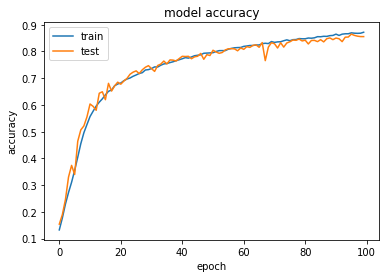

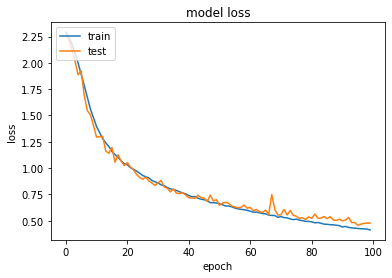

In [28]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



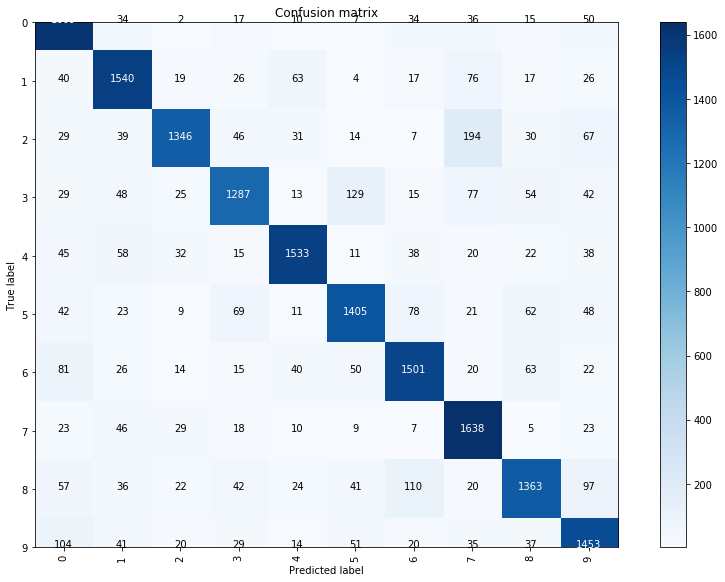

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
# Set the figure size
plt.figure(figsize=(12, 8))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,fmt='.1f', square=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Predict the values from the validation dataset
Y_pred = keras_model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [30]:
print(confusion_mtx )

[[1609   34    2   17   10    7   34   36   15   50]
 [  40 1540   19   26   63    4   17   76   17   26]
 [  29   39 1346   46   31   14    7  194   30   67]
 [  29   48   25 1287   13  129   15   77   54   42]
 [  45   58   32   15 1533   11   38   20   22   38]
 [  42   23    9   69   11 1405   78   21   62   48]
 [  81   26   14   15   40   50 1501   20   63   22]
 [  23   46   29   18   10    9    7 1638    5   23]
 [  57   36   22   42   24   41  110   20 1363   97]
 [ 104   41   20   29   14   51   20   35   37 1453]]


In [31]:
print(classification_report(Y_true, Y_pred_classes, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.81      0.84      0.83      1828
           2       0.89      0.75      0.81      1803
           3       0.82      0.75      0.78      1719
           4       0.88      0.85      0.86      1812
           5       0.82      0.79      0.81      1768
           6       0.82      0.82      0.82      1832
           7       0.77      0.91      0.83      1808
           8       0.82      0.75      0.78      1812
           9       0.78      0.81      0.79      1804

   micro avg       0.82      0.81      0.81     16186
   macro avg       0.82      0.81      0.81     16186
weighted avg       0.82      0.81      0.81     16186



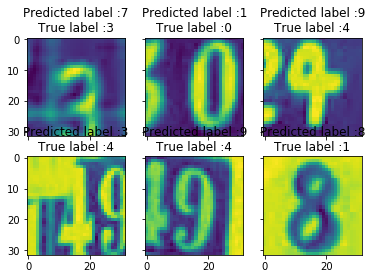

In [32]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [33]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_vali = pd.DataFrame({'Method':['NN_SGD'], 'accuracy': results[1]},index={'1'})
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278


# MODEL1- 
Dense Layers as 512,256 ,128,64,32 

Kernel Initiaizer as 'he normal'

activations as 'Relu'

optimizer as ADAM

batch Size as 200 with 100 epoch.

In [34]:
keras.backend.clear_session()


##Initialize the Artificial Neural Network Classifier
keras_model1 = Sequential()
# Input Layer 
#Adding Input layer and activation functions ReLU 
keras_model1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model1.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model1.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model1.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model1.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model1.add(Activation('softmax'))
# compiling the ANN classifier
keras_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# Fitting the ANN to the Training data
history1 = keras_model1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 298us/step - loss: 2.3098 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 11s 253us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 11s 253us/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 11s 261us/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 12s 277us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 11s 258us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 11s 267us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 56/100
42000/42000 [==============================] - 11s 260us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 57/100
42000/42000 [==============================] - 11s 258us/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 58/100
42000/42000 [==============================] - 11s 259us/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 59/100
42000/42000 [==============================] - 12s 283us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 60/100
42000/42000 [==============================] - 11s 259us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 61/100
42000/42000 [==============================] - 11s 261us/step - loss: 2.3026 - ac

In [36]:
Y_pred1= keras_model1.predict(X_test)
print(np.argmax(Y_pred1[2]))
print(np.argmax(y_test[2]))
print(history1.history.keys())

3
2
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


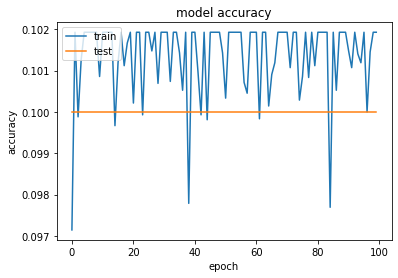

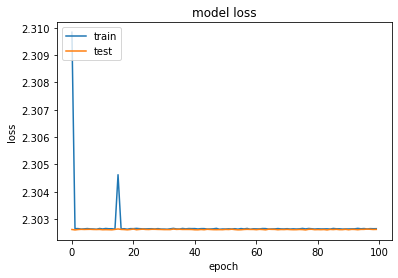

In [37]:
#summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [38]:
results1 = keras_model1.evaluate(X_test, y_test)

18000/18000 [==============================] - 3s 143us/step


In [39]:
print('Test accuracy: ', results1[1])

Test accuracy:  0.09549999982118607


[[   0    0    0 1814    0    0    0    0    0    0]
 [   0    0    0 1828    0    0    0    0    0    0]
 [   0    0    0 1803    0    0    0    0    0    0]
 [   0    0    0 1719    0    0    0    0    0    0]
 [   0    0    0 1812    0    0    0    0    0    0]
 [   0    0    0 1768    0    0    0    0    0    0]
 [   0    0    0 1832    0    0    0    0    0    0]
 [   0    0    0 1808    0    0    0    0    0    0]
 [   0    0    0 1812    0    0    0    0    0    0]
 [   0    0    0 1804    0    0    0    0    0    0]]


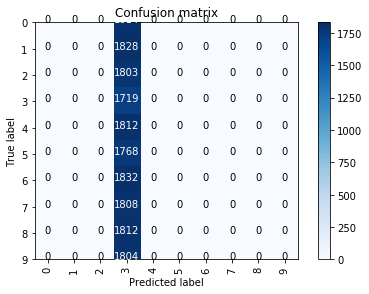

In [40]:

Y_pred_classes1 = np.argmax(Y_pred1,axis = 1) 
# Convert validation observations to one hot vectors
Y_true1 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx1, classes = range(10)) 

print(confusion_mtx1)

In [41]:
print(classification_report(Y_true1, Y_pred_classes1, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.10      1.00      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

   micro avg       0.10      0.11      0.10     16186
   macro avg       0.01      0.11      0.02     16186
weighted avg       0.01      0.11      0.02     16186



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


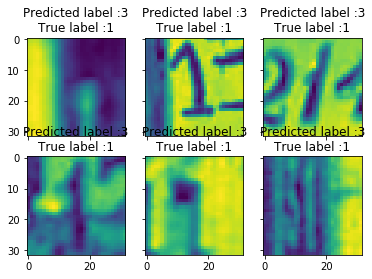

In [42]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors1 = (Y_pred_classes1 - Y_true1 != 0)

Y_pred_classes_errors1 = Y_pred_classes1[errors]
Y_pred_errors1 = Y_pred1[errors]
Y_true_errors1 = Y_true1[errors]
X_val_errors1 = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob1 = np.max(Y_pred_errors1,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors1 = np.diagonal(np.take(Y_pred_errors1, Y_true_errors1, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors1 = Y_pred_errors_prob1 - true_prob_errors1

# Sorted list of the delta prob errors
sorted_dela_errors1 = np.argsort(delta_pred_true_errors1)

# Top 6 errors 
most_important_errors1 = sorted_dela_errors1[-6:]

# Show the top 6 errors
display_errors(most_important_errors1, X_val_errors1, Y_pred_classes_errors1, Y_true_errors1)



In [43]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results1[1]]},index={'2'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali 

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500


# MODEL2- 
Dense Layers as 256 ,64,32 

Kernel Initiaizer as 'he normal'

activations as 'Relu'

dropout as 30 %

batch normalisation 

optimizer as ADAM(LR UPDATED)

batch Size as 200 with 100 epoch.

In [44]:
keras.backend.clear_session()
keras_model_2 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(256, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

keras_model_2.add(Dropout(0.3))


#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))
keras_model_2.add(Dropout(0.3))


#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))  
keras_model_2.add(Dropout(0.3))





# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [45]:
keras_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_8 (Activation)    (None, 64)               

In [46]:
#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 17s 413us/step - loss: 2.5643 - accuracy: 0.1181 - val_loss: 2.2713 - val_accuracy: 0.1393
Epoch 2/100
42000/42000 [==============================] - 12s 279us/step - loss: 2.3385 - accuracy: 0.1653 - val_loss: 2.1172 - val_accuracy: 0.2623
Epoch 3/100
42000/42000 [==============================] - 12s 283us/step - loss: 2.1696 - accuracy: 0.2227 - val_loss: 1.9595 - val_accuracy: 0.3547
Epoch 4/100
42000/42000 [==============================] - 12s 280us/step - loss: 2.0452 - accuracy: 0.2714 - val_loss: 1.8479 - val_accuracy: 0.4341
Epoch 5/100
42000/42000 [==============================] - 12s 278us/step - loss: 1.9370 - accuracy: 0.3244 - val_loss: 1.7083 - val_accuracy: 0.5055
Epoch 6/100
42000/42000 [==============================] - 12s 278us/step - loss: 1.8401 - accuracy: 0.3679 - val_loss: 1.6000 - val_accuracy: 0.5447
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 12s 285us/step - loss: 0.7768 - accuracy: 0.7647 - val_loss: 0.5706 - val_accuracy: 0.8307
Epoch 56/100
42000/42000 [==============================] - 12s 282us/step - loss: 0.7693 - accuracy: 0.7652 - val_loss: 0.5779 - val_accuracy: 0.8278
Epoch 57/100
42000/42000 [==============================] - 12s 279us/step - loss: 0.7620 - accuracy: 0.7676 - val_loss: 0.6555 - val_accuracy: 0.7962
Epoch 58/100
42000/42000 [==============================] - 12s 279us/step - loss: 0.7600 - accuracy: 0.7662 - val_loss: 0.5639 - val_accuracy: 0.8344
Epoch 59/100
42000/42000 [==============================] - 12s 278us/step - loss: 0.7509 - accuracy: 0.7733 - val_loss: 0.5413 - val_accuracy: 0.8413
Epoch 60/100
42000/42000 [==============================] - 12s 281us/step - loss: 0.7427 - accuracy: 0.7743 - val_loss: 0.5998 - val_accuracy: 0.8163
Epoch 61/100
42000/42000 [==============================] - 12s 277us/step - loss: 0.7426 - ac

In [48]:
results2 = keras_model_2.evaluate(X_test, y_test)
print('Test Accuracy: ', results2[1])

18000/18000 [==============================] - 2s 126us/step
Test Accuracy:  0.8300555348396301


In [49]:
Y_pred2= keras_model_2.predict(X_test)

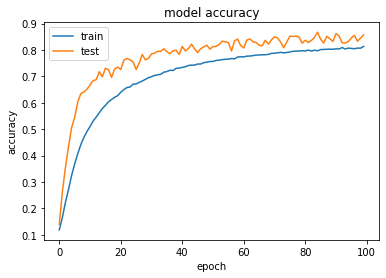

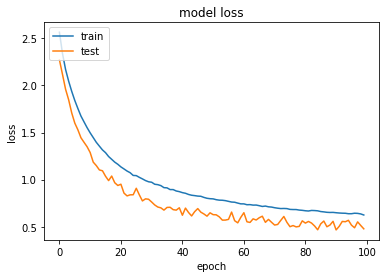

In [50]:
#summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_dense layer updated'], 'accuracy': [results2[1]]},index={'3'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056


[[1620   15    2   14   11   11   54    7   17   63]
 [  44 1518    6   36   55   33   29   37   32   38]
 [  23   32 1402   60   26   26   17   53   63  101]
 [  22   24   14 1264   10  237   34   17   52   45]
 [  34   36   14   18 1538   33   67    7   23   42]
 [   9    8    6   36    9 1558   70    5   37   30]
 [  31   12    9    5   20  101 1583    4   52   15]
 [  37   60   20   47   13   47   30 1503   15   36]
 [  28   20    8   35   15   61  142    5 1445   53]
 [  63   24   11   15   14   92   22   10   43 1510]]


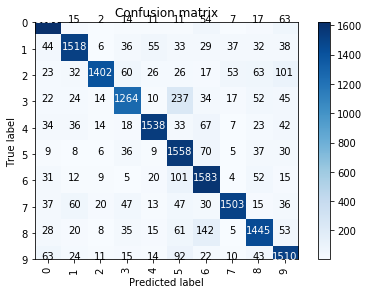

In [52]:
Y_pred_classes2 = np.argmax(Y_pred2,axis = 1) 
# Convert validation observations to one hot vectors
Y_true2 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx2, classes = range(10))  
print(confusion_mtx2)

In [53]:
print(classification_report(Y_true2, Y_pred_classes2, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.87      0.83      0.85      1828
           2       0.94      0.78      0.85      1803
           3       0.83      0.74      0.78      1719
           4       0.90      0.85      0.87      1812
           5       0.71      0.88      0.79      1768
           6       0.77      0.86      0.82      1832
           7       0.91      0.83      0.87      1808
           8       0.81      0.80      0.80      1812
           9       0.78      0.84      0.81      1804

   micro avg       0.83      0.82      0.83     16186
   macro avg       0.84      0.82      0.83     16186
weighted avg       0.84      0.82      0.83     16186



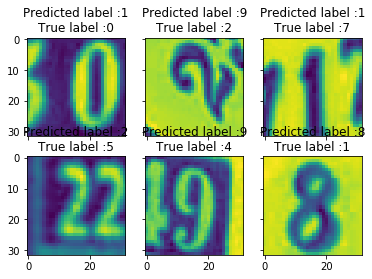

In [54]:
   
# Display some error results 

# Errors are difference between predicted labels and true labels
errors2 = (Y_pred_classes2 - Y_true2 != 0)

Y_pred_classes_errors2 = Y_pred_classes2[errors]
Y_pred_errors2 = Y_pred2[errors]
Y_true_errors2 = Y_true2[errors]
X_val_errors2 = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob2 = np.max(Y_pred_errors2,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors2 = np.diagonal(np.take(Y_pred_errors2, Y_true_errors2, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors2 = Y_pred_errors_prob2- true_prob_errors2

# Sorted list of the delta prob errors
sorted_dela_errors2 = np.argsort(delta_pred_true_errors2)

# Top 6 errors 
most_important_errors2 = sorted_dela_errors2[-6:]

# Show the top 6 errors
display_errors(most_important_errors2, X_val_errors2, Y_pred_classes_errors2, Y_true_errors2)

# MODEL10- 
Dense Layers as 1000,300,100 

Kernel Initiaizer as 'he normal'

activations as 'Relu'

dropout as 20 %

batch normalisation 

optimizer as ADAM(LR UPDATED)

batch Size as 200 with 100 epoch.

In [55]:
keras.backend.clear_session()
Keras_model_10 = Sequential()
#Adding Input layer and activation functions ReLU
Keras_model_10.add(Dense(1000, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
Keras_model_10.add(BatchNormalization())
#Adding Activation function
Keras_model_10.add(Activation('relu'))

Keras_model_10.add(Dropout(0.2))


#Hidden Layer 1
#Adding first Hidden layer
Keras_model_10.add(Dense(300, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
Keras_model_10.add(BatchNormalization())
#Adding Activation function
Keras_model_10.add(Activation('relu'))
Keras_model_10.add(Dropout(0.2))
 

#Hidden Layer 2
#Adding second Hidden layer
Keras_model_10.add(Dense(100, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
Keras_model_10.add(BatchNormalization())
#Adding Activation function
Keras_model_10.add(Activation('relu'))  
Keras_model_10.add(Dropout(0.2))





# Output Layer
#Adding output layer which is of 10 nodes (digidts)
Keras_model_10.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
Keras_model_10.add(Activation('softmax'))

In [56]:
Keras_model_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               300300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)              

In [57]:
#Setting the learning rate in sgd
adam= optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
Keras_model_10.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
# Fitting the ANN to the Training data
history_10 = Keras_model_10.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 40s 946us/step - loss: 2.2508 - accuracy: 0.2301 - val_loss: 2.0002 - val_accuracy: 0.3572
Epoch 2/100
42000/42000 [==============================] - 34s 806us/step - loss: 1.6097 - accuracy: 0.4699 - val_loss: 1.4663 - val_accuracy: 0.5700
Epoch 3/100
42000/42000 [==============================] - 34s 813us/step - loss: 1.3145 - accuracy: 0.5885 - val_loss: 1.1556 - val_accuracy: 0.6734
Epoch 4/100
42000/42000 [==============================] - 34s 816us/step - loss: 1.1434 - accuracy: 0.6490 - val_loss: 1.0232 - val_accuracy: 0.7035
Epoch 5/100
42000/42000 [==============================] - 35s 829us/step - loss: 1.0352 - accuracy: 0.6816 - val_loss: 0.9621 - val_accuracy: 0.7135
Epoch 6/100
42000/42000 [==============================] - 34s 821us/step - loss: 0.9461 - accuracy: 0.7105 - val_loss: 0.9338 - val_accuracy: 0.7278
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 34s 815us/step - loss: 0.3251 - accuracy: 0.8951 - val_loss: 0.4573 - val_accuracy: 0.8569
Epoch 56/100
42000/42000 [==============================] - 34s 813us/step - loss: 0.3241 - accuracy: 0.8948 - val_loss: 0.6169 - val_accuracy: 0.8101
Epoch 57/100
42000/42000 [==============================] - 34s 809us/step - loss: 0.3151 - accuracy: 0.8987 - val_loss: 0.4255 - val_accuracy: 0.8647
Epoch 58/100
42000/42000 [==============================] - 34s 821us/step - loss: 0.3166 - accuracy: 0.8980 - val_loss: 0.4736 - val_accuracy: 0.8500
Epoch 59/100
42000/42000 [==============================] - 35s 824us/step - loss: 0.3109 - accuracy: 0.9013 - val_loss: 0.4879 - val_accuracy: 0.8457
Epoch 60/100
42000/42000 [==============================] - 34s 814us/step - loss: 0.3094 - accuracy: 0.8993 - val_loss: 0.3773 - val_accuracy: 0.8846
Epoch 61/100
42000/42000 [==============================] - 34s 819us/step - loss: 0.3051 - ac

In [59]:
results10 = Keras_model_10.evaluate(X_test, y_test)
print('Test Accuracy: ', results10[1])

18000/18000 [==============================] - 5s 271us/step
Test Accuracy:  0.7876666784286499


In [60]:
Y_pred10= Keras_model_10.predict(X_test)

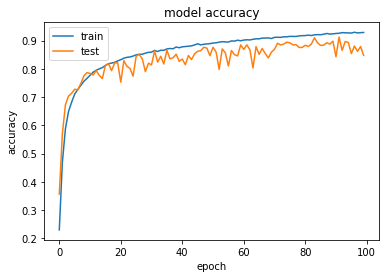

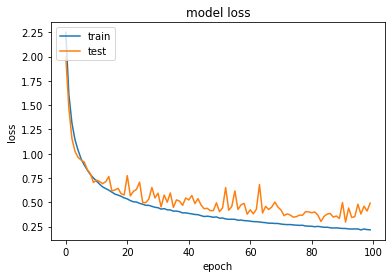

In [61]:
#summarize history for accuracy
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Dense updated'], 'accuracy': [results10[1]]},index={'4'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667


[[1272   23   29   48    7    5   45    8  294   83]
 [   5 1373   48  106   19    6   11   20  212   28]
 [   2    3 1562   75    5    4    3   15  101   33]
 [   3    9   26 1499    2   17   14    8  120   21]
 [   4   34   42   49 1400    3   45    9  174   52]
 [   2    5   12  230    3 1198   79    3  193   43]
 [   7    9   17   37   11   26 1346    4  358   17]
 [   3   55  143   95    7    5    9 1394   68   29]
 [   4   10   10   53    2    5   21    8 1674   25]
 [   7   12   29   61    4   10   12   10  199 1460]]


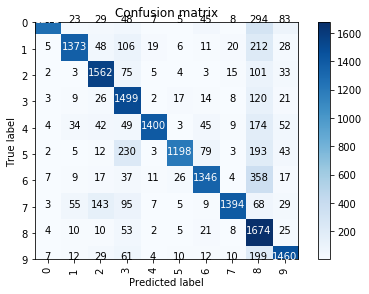

In [63]:
Y_pred_classes10 = np.argmax(Y_pred10,axis = 1) 
# Convert validation observations to one hot vectors
Y_true10 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx10 = confusion_matrix(Y_true10, Y_pred_classes10) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx10, classes = range(10)) 
print(confusion_mtx10)

In [64]:
print(classification_report(Y_true10, Y_pred_classes10, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.90      0.75      0.82      1828
           2       0.81      0.87      0.84      1803
           3       0.67      0.87      0.75      1719
           4       0.96      0.77      0.86      1812
           5       0.94      0.68      0.79      1768
           6       0.85      0.73      0.79      1832
           7       0.94      0.77      0.85      1808
           8       0.49      0.92      0.64      1812
           9       0.82      0.81      0.81      1804

   micro avg       0.77      0.80      0.79     16186
   macro avg       0.82      0.80      0.79     16186
weighted avg       0.82      0.80      0.79     16186



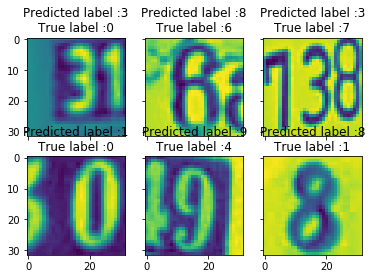

In [65]:
   
# Display some error results 

# Errors are difference between predicted labels and true labels
errors10 = (Y_pred_classes10 - Y_true10 != 0)

Y_pred_classes_errors10 = Y_pred_classes10[errors]
Y_pred_errors10 = Y_pred10[errors]
Y_true_errors10 = Y_true10[errors]
X_val_errors10 = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob10 = np.max(Y_pred_errors10,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors10 = np.diagonal(np.take(Y_pred_errors10, Y_true_errors10, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors10 = Y_pred_errors_prob10- true_prob_errors10

# Sorted list of the delta prob errors
sorted_dela_errors10 = np.argsort(delta_pred_true_errors10)

# Top 6 errors 
most_important_errors10 = sorted_dela_errors10[-6:]

# Show the top 6 errors
display_errors(most_important_errors10, X_val_errors10, Y_pred_classes_errors10, Y_true_errors10)

# MODEL11- 
Dense Layers as 500,300,200

Kernel Initiaizer as 'he normal'

activations as 'Relu'

dropout as 50 %

batch normalisation 

optimizer as ADAM(LR UPDATED)

batch Size as 200 with 100 epoch.

In [66]:

keras.backend.clear_session()
keras_model_11 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_11.add(Dense(500, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_11.add(BatchNormalization())
#Adding Activation function
keras_model_11.add(Activation('relu'))
keras_model_11.add(Dropout(0.5))




#Hidden Layer 1
#Adding first Hidden layer
keras_model_11.add(Dense(300, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_11.add(BatchNormalization())
#Adding Activation function
keras_model_11.add(Activation('relu'))
keras_model_11.add(Dropout(0.5))


#Hidden Layer 2
#Adding second Hidden layer
keras_model_11.add(Dense(200, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_11.add(BatchNormalization())
#Adding Activation function
keras_model_11.add(Activation('relu'))
keras_model_11.add(Dropout(0.5))




# Output Layer 
#Adding output layer which is of 10 nodes (digidts)
keras_model_11.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_11.add(Activation('softmax'))

#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_11.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_11 = keras_model_11.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 30s 719us/step - loss: 2.8265 - accuracy: 0.1135 - val_loss: 2.2465 - val_accuracy: 0.1822
Epoch 2/100
42000/42000 [==============================] - 24s 568us/step - loss: 2.6048 - accuracy: 0.1410 - val_loss: 2.1183 - val_accuracy: 0.2642
Epoch 3/100
42000/42000 [==============================] - 24s 571us/step - loss: 2.4289 - accuracy: 0.1713 - val_loss: 1.9571 - val_accuracy: 0.3781
Epoch 4/100
42000/42000 [==============================] - 24s 566us/step - loss: 2.2495 - accuracy: 0.2153 - val_loss: 1.7998 - val_accuracy: 0.4538
Epoch 5/100
42000/42000 [==============================] - 30s 714us/step - loss: 2.0748 - accuracy: 0.2701 - val_loss: 1.6250 - val_accuracy: 0.5436
Epoch 6/100
42000/42000 [==============================] - 25s 585us/step - loss: 1.9241 - accuracy: 0.3224 - val_loss: 1.5124 - val_accuracy: 0.5842
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 25s 587us/step - loss: 0.6985 - accuracy: 0.7828 - val_loss: 0.5536 - val_accuracy: 0.8293
Epoch 56/100
42000/42000 [==============================] - 25s 585us/step - loss: 0.6933 - accuracy: 0.7843 - val_loss: 0.4905 - val_accuracy: 0.8545
Epoch 57/100
42000/42000 [==============================] - 25s 599us/step - loss: 0.6954 - accuracy: 0.7850 - val_loss: 0.5201 - val_accuracy: 0.8408
Epoch 58/100
42000/42000 [==============================] - 25s 588us/step - loss: 0.6911 - accuracy: 0.7853 - val_loss: 0.5436 - val_accuracy: 0.8304
Epoch 59/100
42000/42000 [==============================] - 25s 588us/step - loss: 0.6826 - accuracy: 0.7873 - val_loss: 0.5240 - val_accuracy: 0.8393
Epoch 60/100
42000/42000 [==============================] - 25s 586us/step - loss: 0.6803 - accuracy: 0.7865 - val_loss: 0.5403 - val_accuracy: 0.8356
Epoch 61/100
42000/42000 [==============================] - 25s 587us/step - loss: 0.6744 - ac

In [67]:
keras_model_11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               512500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)              

In [68]:
results11 = keras_model_11.evaluate(X_test, y_test)
print('Test Accuracy: ', results11[1])

18000/18000 [==============================] - 4s 228us/step
Test Accuracy:  0.842555582523346


In [69]:
Y_pred11= keras_model_11.predict(X_test)

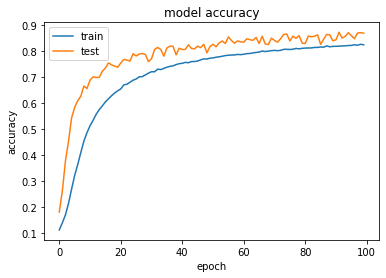

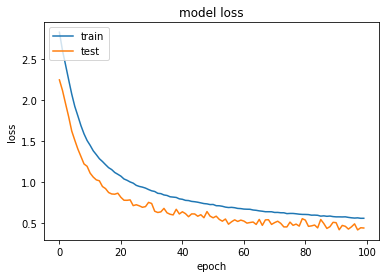

In [70]:
#summarize history for accuracy
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [71]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Adam_dense layer updated'], 'accuracy': [results11[1]]},index={'5'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556


[[1658   14    8   18    9    3   11   27    8   58]
 [  65 1473   20   45   39   12    7  108   10   49]
 [  30   14 1542   58   11   11    1   72    8   56]
 [  24   17   28 1404   10  124   13   46   20   33]
 [  48   34   29   30 1507   16   28   29   11   80]
 [  19    4   12   82    5 1540   36   12   12   46]
 [  75   15   14   25   22  101 1474   17   48   41]
 [  24   28   19   24    9    8    3 1658    4   31]
 [  65   26   23   83    6   44   71   22 1343  129]
 [  64   21   20   37    9   42    5   28   11 1567]]


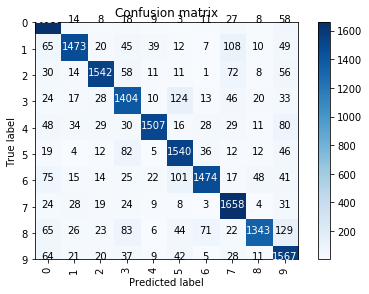

In [72]:
Y_pred_classes11 = np.argmax(Y_pred11,axis = 1) 
# Convert validation observations to one hot vectors
Y_true11 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx11 = confusion_matrix(Y_true11, Y_pred_classes11) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx11, classes = range(10)) 
print(confusion_mtx11)

In [73]:
print(classification_report(Y_true11, Y_pred_classes11, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.89      0.81      0.85      1828
           2       0.90      0.86      0.88      1803
           3       0.78      0.82      0.80      1719
           4       0.93      0.83      0.88      1812
           5       0.81      0.87      0.84      1768
           6       0.89      0.80      0.85      1832
           7       0.82      0.92      0.87      1808
           8       0.91      0.74      0.82      1812
           9       0.75      0.87      0.80      1804

   micro avg       0.85      0.83      0.84     16186
   macro avg       0.85      0.83      0.84     16186
weighted avg       0.85      0.83      0.84     16186



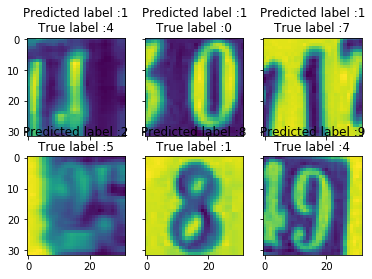

In [74]:
   
# Display some error results 

# Errors are difference between predicted labels and true labels
errors11 = (Y_pred_classes11 - Y_true11 != 0)

Y_pred_classes_errors11 = Y_pred_classes11[errors]
Y_pred_errors11 = Y_pred11[errors]
Y_true_errors11 = Y_true11[errors]
X_val_errors11 = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob11 = np.max(Y_pred_errors11,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors11 = np.diagonal(np.take(Y_pred_errors11, Y_true_errors11, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors11 = Y_pred_errors_prob11- true_prob_errors11

# Sorted list of the delta prob errors
sorted_dela_errors11 = np.argsort(delta_pred_true_errors11)

# Top 6 errors 
most_important_errors11 = sorted_dela_errors11[-6:]

# Show the top 6 errors
display_errors(most_important_errors11, X_val_errors11, Y_pred_classes_errors11, Y_true_errors11)

# MODEL12 - 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'uniform'

activations as 'Relu'

dropout as 20 %

batch normalisation 

optimizer as ADAM(LR UPDATED)

batch Size as 200 with 100 epoch.

In [75]:

keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier
keras_model_12 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_12.add(Dense(512, kernel_initializer='uniform',input_shape = (1024, )))
keras_model_12.add(Activation('relu'))
#Adding BatchNormalization Layer
keras_model_12.add(BatchNormalization())
keras_model_12.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_12.add(Dense(256, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_12.add(BatchNormalization())
#Adding Activation function
keras_model_12.add(Activation('relu'))
keras_model_12.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_12.add(Dense(128, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_12.add(BatchNormalization())
#Adding Activation function
keras_model_12.add(Activation('relu'))
keras_model_12.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_12.add(Dense(64, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_12.add(BatchNormalization())
#Adding Activation function
keras_model_12.add(Activation('relu'))
keras_model_12.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_12.add(Dense(32, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_12.add(BatchNormalization())
#Adding Activation function
keras_model_12.add(Activation('relu')) 
keras_model_12.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_12.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_12.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_12.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_12 = keras_model_12.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 35s 831us/step - loss: 2.4384 - accuracy: 0.1387 - val_loss: 2.2915 - val_accuracy: 0.1067
Epoch 2/100
42000/42000 [==============================] - 25s 591us/step - loss: 2.0563 - accuracy: 0.2659 - val_loss: 1.9020 - val_accuracy: 0.4027
Epoch 3/100
42000/42000 [==============================] - 25s 591us/step - loss: 1.7779 - accuracy: 0.3883 - val_loss: 1.4875 - val_accuracy: 0.5535
Epoch 4/100
42000/42000 [==============================] - 25s 592us/step - loss: 1.5758 - accuracy: 0.4820 - val_loss: 1.2873 - val_accuracy: 0.6300
Epoch 5/100
42000/42000 [==============================] - 25s 596us/step - loss: 1.4382 - accuracy: 0.5403 - val_loss: 1.2484 - val_accuracy: 0.6274
Epoch 6/100
42000/42000 [==============================] - 25s 604us/step - loss: 1.3439 - accuracy: 0.5762 - val_loss: 1.1465 - val_accuracy: 0.6676
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 25s 592us/step - loss: 0.6659 - accuracy: 0.7999 - val_loss: 0.5714 - val_accuracy: 0.8221
Epoch 56/100
42000/42000 [==============================] - 25s 592us/step - loss: 0.6638 - accuracy: 0.8001 - val_loss: 0.5457 - val_accuracy: 0.8302
Epoch 57/100
42000/42000 [==============================] - 25s 591us/step - loss: 0.6734 - accuracy: 0.7987 - val_loss: 0.5289 - val_accuracy: 0.8371
Epoch 58/100
42000/42000 [==============================] - 25s 594us/step - loss: 0.6582 - accuracy: 0.8031 - val_loss: 0.4847 - val_accuracy: 0.8531
Epoch 59/100
42000/42000 [==============================] - 25s 593us/step - loss: 0.6574 - accuracy: 0.8019 - val_loss: 0.5526 - val_accuracy: 0.8258
Epoch 60/100
42000/42000 [==============================] - 25s 592us/step - loss: 0.6529 - accuracy: 0.8068 - val_loss: 0.4935 - val_accuracy: 0.8478
Epoch 61/100
42000/42000 [==============================] - 25s 604us/step - loss: 0.6473 - ac

In [76]:
keras_model_12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [77]:
results12 = keras_model_12.evaluate(X_test, y_test)
print('Test Accuracy: ', results12[1])

18000/18000 [==============================] - 4s 242us/step
Test Accuracy:  0.8484444618225098


[[1578   36   18   19   24    5   37   25   26   46]
 [  21 1592   33   18   43    9   16   56   26   14]
 [  11   23 1573   29   23   16    9   60   20   39]
 [  14   30   75 1357    9  106   20   38   28   42]
 [  15   46   36   22 1589   14   21   11   17   41]
 [   6   18   21   76   12 1510   39   12   34   40]
 [  45   27   15   13   40   75 1502    8   86   21]
 [  20   55   47   25   14    6   12 1610   11    8]
 [  25   35   33   51   18   43   83   11 1445   68]
 [  34   29   34   33   20   46    9   24   59 1516]]


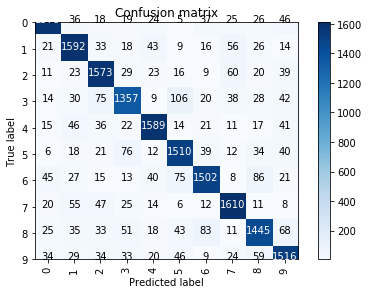

In [78]:
Y_pred12= keras_model_12.predict(X_test)
Y_pred_classes12 = np.argmax(Y_pred12,axis = 1) 
# Convert validation observations to one hot vectors
Y_true12 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx12 = confusion_matrix(Y_true12, Y_pred_classes12) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx12, classes = range(10)) 
print(confusion_mtx12)

In [79]:
print(classification_report(Y_true12, Y_pred_classes12, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.84      0.87      0.86      1828
           2       0.83      0.87      0.85      1803
           3       0.83      0.79      0.81      1719
           4       0.89      0.88      0.88      1812
           5       0.83      0.85      0.84      1768
           6       0.86      0.82      0.84      1832
           7       0.87      0.89      0.88      1808
           8       0.82      0.80      0.81      1812
           9       0.83      0.84      0.83      1804

   micro avg       0.84      0.85      0.84     16186
   macro avg       0.84      0.85      0.84     16186
weighted avg       0.84      0.85      0.84     16186



In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Adam_LR dropout updated'], 'accuracy': [results12[1]]},index={'6'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444


# MODEL13- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'he normal'

activations as 'Relu'

dropout as 30 %

batch normalisation 

optimizer as ADAM(LR UPDATED)

batch Size as 200 with 100 epoch.

In [81]:
keras.backend.clear_session()
# Input Layer
##Initialize the Artificial Neural Network Classifier
keras_model_13 = Sequential() 
#Hidden Layer 1
#Adding first Hidden layer
keras_model_13.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_13.add(BatchNormalization())
#Adding Activation function
keras_model_13.add(Activation('relu'))
keras_model_13.add(Dropout(0.3))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_13.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_13.add(BatchNormalization())
#Adding Activation function
keras_model_13.add(Activation('relu'))
keras_model_13.add(Dropout(0.3))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_13.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_13.add(BatchNormalization())
#Adding Activation function
keras_model_13.add(Activation('relu'))
keras_model_13.add(Dropout(0.3))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_13.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_13.add(BatchNormalization())
#Adding Activation function
keras_model_13.add(Activation('relu'))
keras_model_13.add(Dropout(0.3))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_13.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_13.add(Activation('softmax'))

#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_13.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_13 = keras_model_13.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 24s 560us/step - loss: 2.5540 - accuracy: 0.1117 - val_loss: 2.2823 - val_accuracy: 0.1414
Epoch 2/100
42000/42000 [==============================] - 16s 386us/step - loss: 2.4137 - accuracy: 0.1350 - val_loss: 2.1772 - val_accuracy: 0.2275
Epoch 3/100
42000/42000 [==============================] - 15s 365us/step - loss: 2.2974 - accuracy: 0.1663 - val_loss: 2.0816 - val_accuracy: 0.2876
Epoch 4/100
42000/42000 [==============================] - 14s 338us/step - loss: 2.1944 - accuracy: 0.2011 - val_loss: 1.9836 - val_accuracy: 0.3442
Epoch 5/100
42000/42000 [==============================] - 14s 341us/step - loss: 2.1086 - accuracy: 0.2326 - val_loss: 1.9259 - val_accuracy: 0.3784
Epoch 6/100
42000/42000 [==============================] - 14s 340us/step - loss: 2.0139 - accuracy: 0.2714 - val_loss: 1.7632 - val_accuracy: 0.4581
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 14s 342us/step - loss: 0.8059 - accuracy: 0.7594 - val_loss: 0.6196 - val_accuracy: 0.8144
Epoch 56/100
42000/42000 [==============================] - 14s 338us/step - loss: 0.8016 - accuracy: 0.7594 - val_loss: 0.5820 - val_accuracy: 0.8289
Epoch 57/100
42000/42000 [==============================] - 14s 340us/step - loss: 0.7939 - accuracy: 0.7621 - val_loss: 0.5349 - val_accuracy: 0.8432
Epoch 58/100
42000/42000 [==============================] - 15s 348us/step - loss: 0.7915 - accuracy: 0.7637 - val_loss: 0.6087 - val_accuracy: 0.8152
Epoch 59/100
42000/42000 [==============================] - 14s 338us/step - loss: 0.7844 - accuracy: 0.7661 - val_loss: 0.7007 - val_accuracy: 0.7818
Epoch 60/100
42000/42000 [==============================] - 14s 341us/step - loss: 0.7838 - accuracy: 0.7656 - val_loss: 0.5638 - val_accuracy: 0.8310
Epoch 61/100
42000/42000 [==============================] - 14s 340us/step - loss: 0.7799 - ac

In [82]:
keras_model_13.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
activation_8 (Activation)    (None, 128)              

In [83]:
results13 = keras_model_13.evaluate(X_test, y_test)
print('Test Accuracy: ', results13[1])

18000/18000 [==============================] - 3s 156us/step
Test Accuracy:  0.832111120223999


In [84]:
Y_pred13= keras_model_13.predict(X_test)

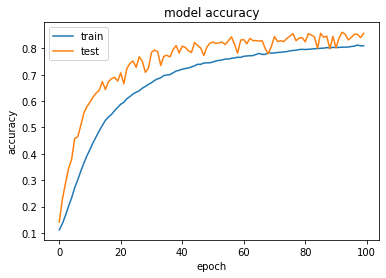

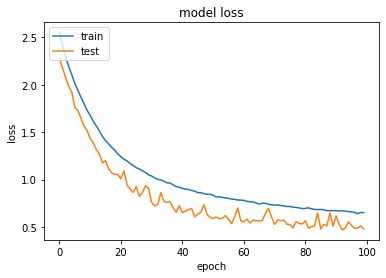

In [85]:
#summarize history for accuracy
plt.plot(history_final_13.history['accuracy'])
plt.plot(history_final_13.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_13.history['loss'])
plt.plot(history_final_13.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Adam_4 hidden layers'], 'accuracy': [results13[1]]},index={'7'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111


[[1557   56    1   16   28   13   23   11   22   87]
 [  19 1652    3   25   48    9    6   22   22   22]
 [  13   64 1405   60   45   19    4   68   38   87]
 [   6   63   15 1332   22  175   10   15   52   29]
 [  14   77   12    9 1611   19   16    7   13   34]
 [   5   33    3   69   21 1533   31    3   41   29]
 [  27   50    7   18   61  118 1394    4  130   23]
 [  15  139   25   30   16   14   10 1529   11   19]
 [  13   71    9   52   25   58   60    5 1456   63]
 [  41   59    5   36   31   70    2    9   42 1509]]


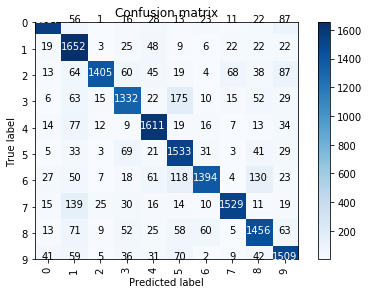

In [87]:
Y_pred_classes13 = np.argmax(Y_pred13,axis = 1) 
# Convert validation observations to one hot vectors
Y_true13 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx13 = confusion_matrix(Y_true13, Y_pred_classes13) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx13, classes = range(10)) 
print(confusion_mtx13)

In [88]:
print(classification_report(Y_true13, Y_pred_classes13, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.73      0.90      0.81      1828
           2       0.95      0.78      0.85      1803
           3       0.81      0.77      0.79      1719
           4       0.84      0.89      0.87      1812
           5       0.76      0.87      0.81      1768
           6       0.90      0.76      0.82      1832
           7       0.91      0.85      0.88      1808
           8       0.80      0.80      0.80      1812
           9       0.79      0.84      0.81      1804

   micro avg       0.82      0.83      0.83     16186
   macro avg       0.83      0.83      0.83     16186
weighted avg       0.83      0.83      0.83     16186



# MODEL14- 
Dense Layers as 684,342,170

activations as 'Relu'

optimizer as ADAM

batch Size as 200 with 100 epoch.

In [92]:
tf.keras.backend.clear_session()
##Initialize the Artificial Neural Network Classifier
keras_model_14 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_14.add(Dense(684,input_shape = (1024, )))
keras_model_14.add(Activation('relu'))


#Hidden Layer 2
#Adding second Hidden layer
keras_model_14.add(Dense(342))
#Adding Activation function
keras_model_14.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_14.add(Dense(170))
#Adding Activation function
keras_model_14.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_14.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_14.add(Activation('softmax'))


# compiling the ANN classifier
keras_model_14.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [93]:
#Fitting the ANN to the Training data
history_final_14 = keras_model_14.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 16s 380us/step - loss: 2.1935 - accuracy: 0.1774 - val_loss: 1.7653 - val_accuracy: 0.3690
Epoch 2/100
42000/42000 [==============================] - 14s 339us/step - loss: 1.4379 - accuracy: 0.5200 - val_loss: 1.2499 - val_accuracy: 0.5925
Epoch 3/100
42000/42000 [==============================] - 14s 338us/step - loss: 1.1581 - accuracy: 0.6332 - val_loss: 1.0759 - val_accuracy: 0.6618
Epoch 4/100
42000/42000 [==============================] - 14s 338us/step - loss: 1.0291 - accuracy: 0.6789 - val_loss: 0.9304 - val_accuracy: 0.7144
Epoch 5/100
42000/42000 [==============================] - 14s 338us/step - loss: 0.9396 - accuracy: 0.7073 - val_loss: 0.9074 - val_accuracy: 0.7176
Epoch 6/100
42000/42000 [==============================] - 14s 345us/step - loss: 0.8743 - accuracy: 0.7287 - val_loss: 0.9060 - val_accuracy: 0.7158
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 15s 345us/step - loss: 0.2313 - accuracy: 0.9234 - val_loss: 0.3659 - val_accuracy: 0.8976
Epoch 56/100
42000/42000 [==============================] - 14s 343us/step - loss: 0.2430 - accuracy: 0.9186 - val_loss: 0.3734 - val_accuracy: 0.8968
Epoch 57/100
42000/42000 [==============================] - 14s 344us/step - loss: 0.2059 - accuracy: 0.9309 - val_loss: 0.3485 - val_accuracy: 0.9061
Epoch 58/100
42000/42000 [==============================] - 14s 332us/step - loss: 0.2072 - accuracy: 0.9310 - val_loss: 0.3223 - val_accuracy: 0.9154
Epoch 59/100
42000/42000 [==============================] - 14s 323us/step - loss: 0.2155 - accuracy: 0.9280 - val_loss: 0.3610 - val_accuracy: 0.9031
Epoch 60/100
42000/42000 [==============================] - 14s 322us/step - loss: 0.1983 - accuracy: 0.9338 - val_loss: 0.3146 - val_accuracy: 0.9197
Epoch 61/100
42000/42000 [==============================] - 14s 322us/step - loss: 0.1896 - ac

In [94]:
keras_model_14.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 684)               701100    
_________________________________________________________________
activation_1 (Activation)    (None, 684)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 342)               234270    
_________________________________________________________________
activation_2 (Activation)    (None, 342)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 170)               58310     
_________________________________________________________________
activation_3 (Activation)    (None, 170)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [95]:
results14 = keras_model_14.evaluate(X_test, y_test)
print('Test Accuracy: ', results14[1])

18000/18000 [==============================] - 2s 124us/step
Test Accuracy:  0.8297777771949768


In [96]:
Y_pred14= keras_model_14.predict(X_test)

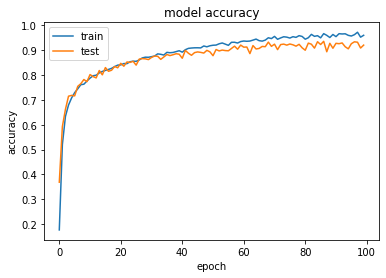

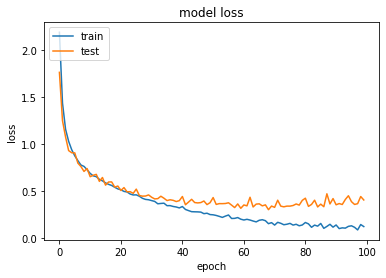

In [97]:
#summarize history for accuracy
plt.plot(history_final_14.history['accuracy'])
plt.plot(history_final_14.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_14.history['loss'])
plt.plot(history_final_14.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Adam_dense updated'], 'accuracy': [results14[1]]},index={'8'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778


[[1558   45   11   30   39   10   27   20   35   39]
 [  33 1574   19   30   67   14   16   29   29   17]
 [  20   38 1492   36   43   17    8   70   36   43]
 [  16   48   46 1310   35  132   17   30   41   44]
 [  18   43   16   29 1615   18   14   12   24   23]
 [  22   15   13   76   24 1477   40   14   53   34]
 [  34   23   15   23   48   79 1450   14  125   21]
 [  11   77   39   24   20   10   14 1577   13   23]
 [  31   48   19   46   45   47   68   14 1430   64]
 [  54   39   32   45   37   59   14   29   42 1453]]


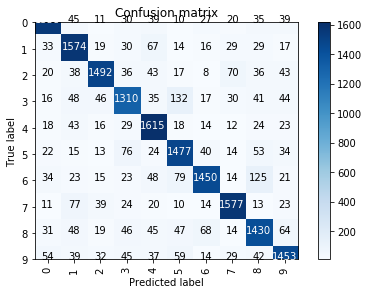

In [99]:
Y_pred_classes14 = np.argmax(Y_pred14,axis = 1) 
# Convert validation observations to one hot vectors
Y_true14 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx14 = confusion_matrix(Y_true14, Y_pred_classes14) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx14, classes = range(10)) 
print(confusion_mtx14)

In [100]:
print(classification_report(Y_true14, Y_pred_classes14, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.81      0.86      0.83      1828
           2       0.88      0.83      0.85      1803
           3       0.79      0.76      0.78      1719
           4       0.82      0.89      0.85      1812
           5       0.79      0.84      0.81      1768
           6       0.87      0.79      0.83      1832
           7       0.87      0.87      0.87      1808
           8       0.78      0.79      0.79      1812
           9       0.83      0.81      0.82      1804

   micro avg       0.83      0.83      0.83     16186
   macro avg       0.83      0.83      0.83     16186
weighted avg       0.83      0.83      0.83     16186



# MODEL18- 
Dense Layers as 684,342,170

Kernel Initiaizer as 'he normal'

activations as 'Relu'

optimizer as ADAM

batch Size as 128 with 100 epoch.

In [101]:
tf.keras.backend.clear_session()
##Initialize the Artificial Neural Network Classifier
keras_model_18 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_18.add(Dense(684,input_shape = (1024, )))
keras_model_18.add(Activation('relu'))


#Hidden Layer 2
#Adding second Hidden layer
keras_model_18.add(Dense(342))
#Adding Activation function
keras_model_18.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_18.add(Dense(170))
#Adding Activation function
keras_model_18.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_18.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_18.add(Activation('softmax'))


# compiling the ANN classifier
keras_model_18.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_18 = keras_model_18.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 19s 450us/step - loss: 2.0688 - accuracy: 0.2321 - val_loss: 1.5277 - val_accuracy: 0.4972
Epoch 2/100
42000/42000 [==============================] - 17s 414us/step - loss: 1.3500 - accuracy: 0.5538 - val_loss: 1.2775 - val_accuracy: 0.5698
Epoch 3/100
42000/42000 [==============================] - 18s 419us/step - loss: 1.1352 - accuracy: 0.6386 - val_loss: 1.0370 - val_accuracy: 0.6805
Epoch 4/100
42000/42000 [==============================] - 18s 427us/step - loss: 1.0044 - accuracy: 0.6835 - val_loss: 1.1447 - val_accuracy: 0.6380
Epoch 5/100
42000/42000 [==============================] - 18s 422us/step - loss: 0.9283 - accuracy: 0.7090 - val_loss: 0.8490 - val_accuracy: 0.7396
Epoch 6/100
42000/42000 [==============================] - 18s 422us/step - loss: 0.8522 - accuracy: 0.7370 - val_loss: 0.9682 - val_accuracy: 0.6851
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 18s 424us/step - loss: 0.2152 - accuracy: 0.9270 - val_loss: 0.4146 - val_accuracy: 0.8827
Epoch 56/100
42000/42000 [==============================] - 18s 426us/step - loss: 0.2192 - accuracy: 0.9257 - val_loss: 0.4781 - val_accuracy: 0.8669
Epoch 57/100
42000/42000 [==============================] - 18s 419us/step - loss: 0.2128 - accuracy: 0.9278 - val_loss: 0.4175 - val_accuracy: 0.8870
Epoch 58/100
42000/42000 [==============================] - 18s 424us/step - loss: 0.2324 - accuracy: 0.9208 - val_loss: 0.4335 - val_accuracy: 0.8807
Epoch 59/100
42000/42000 [==============================] - 18s 419us/step - loss: 0.1966 - accuracy: 0.9328 - val_loss: 0.3867 - val_accuracy: 0.8979
Epoch 60/100
42000/42000 [==============================] - 18s 422us/step - loss: 0.1967 - accuracy: 0.9335 - val_loss: 0.3744 - val_accuracy: 0.9043
Epoch 61/100
42000/42000 [==============================] - 18s 421us/step - loss: 0.1957 - ac

In [102]:
keras_model_18.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 684)               701100    
_________________________________________________________________
activation_1 (Activation)    (None, 684)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 342)               234270    
_________________________________________________________________
activation_2 (Activation)    (None, 342)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 170)               58310     
_________________________________________________________________
activation_3 (Activation)    (None, 170)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [103]:
results18 = keras_model_18.evaluate(X_test, y_test)
print('Test Accuracy: ', results18[1])

18000/18000 [==============================] - 2s 120us/step
Test Accuracy:  0.8216666579246521


In [104]:
Y_pred18= keras_model_18.predict(X_test)

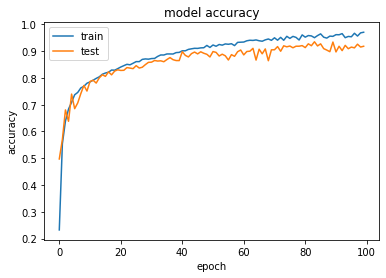

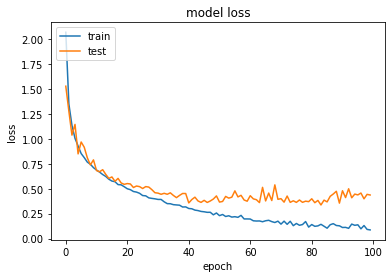

In [105]:
#summarize history for accuracy
plt.plot(history_18.history['accuracy'])
plt.plot(history_18.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_18.history['loss'])
plt.plot(history_18.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [106]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Adam_batch and no normalisation'], 'accuracy': [results18[1]]},index={'9'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667


[[1575   54   13   21   31    3   20   20   41   36]
 [  27 1604   21   33   52    4   10   36   22   19]
 [  20   37 1492   49   56    9   10   60   28   42]
 [  18   67   35 1327   39   92   26   37   51   27]
 [  21   43   20   20 1613    9   26   11   21   28]
 [  23   36   13  107   37 1356   66   17   61   52]
 [  72   31   13   29   61   59 1430   14   97   26]
 [  18   78   50   19   22    5    8 1575   16   17]
 [  54   70   30   51   46   36   69   11 1383   62]
 [  69   56   30   37   40   33   14   21   69 1435]]


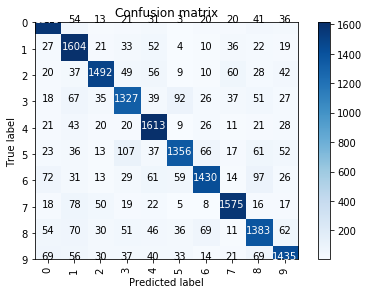

In [107]:
Y_pred_classes18 = np.argmax(Y_pred18,axis = 1) 
# Convert validation observations to one hot vectors
Y_true18 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx18 = confusion_matrix(Y_true18, Y_pred_classes18) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx18, classes = range(10)) 
print(confusion_mtx18)

In [108]:
print(classification_report(Y_true18, Y_pred_classes18, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.77      0.88      0.82      1828
           2       0.87      0.83      0.85      1803
           3       0.78      0.77      0.78      1719
           4       0.81      0.89      0.85      1812
           5       0.84      0.77      0.80      1768
           6       0.85      0.78      0.81      1832
           7       0.87      0.87      0.87      1808
           8       0.77      0.76      0.77      1812
           9       0.82      0.80      0.81      1804

   micro avg       0.82      0.82      0.82     16186
   macro avg       0.82      0.82      0.82     16186
weighted avg       0.82      0.82      0.82     16186



# MODEL20- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'he normal' in1st layer and then glorot_uniform

activations as 'Relu'

dropout as 10 %

optimizer as RMsProp

batch Size as 128 with 100 epoch.

In [109]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier
keras_model_20 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_20.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_20.add(Activation('relu'))
keras_model_20.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_20.add(Dense(256, kernel_initializer='glorot_uniform',))

#Adding Activation function
keras_model_20.add(Activation('relu'))
keras_model_20.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_20.add(Dense(128, kernel_initializer='glorot_uniform')) 

#Adding Activation function
keras_model_20.add(Activation('relu'))
keras_model_20.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_20.add(Dense(64, kernel_initializer='glorot_uniform',))

#Adding Activation function
keras_model_20.add(Activation('relu'))
keras_model_20.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_20.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_20.add(Activation('softmax'))


#Setting the learning rate in sgd

RMS = optimizers. RMSprop(lr = 0.0001)
# compiling the ANN classifier
keras_model_20.compile(optimizer = RMS, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_20 = keras_model_20.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 19s 451us/step - loss: 2.2901 - accuracy: 0.1327 - val_loss: 2.2280 - val_accuracy: 0.1940
Epoch 2/100
42000/42000 [==============================] - 17s 404us/step - loss: 2.0850 - accuracy: 0.2712 - val_loss: 1.8375 - val_accuracy: 0.4115
Epoch 3/100
42000/42000 [==============================] - 17s 405us/step - loss: 1.7692 - accuracy: 0.3943 - val_loss: 1.6021 - val_accuracy: 0.4726
Epoch 4/100
42000/42000 [==============================] - 17s 401us/step - loss: 1.5633 - accuracy: 0.4767 - val_loss: 1.3917 - val_accuracy: 0.5655
Epoch 5/100
42000/42000 [==============================] - 17s 400us/step - loss: 1.4219 - accuracy: 0.5382 - val_loss: 1.4066 - val_accuracy: 0.5365
Epoch 6/100
42000/42000 [==============================] - 17s 403us/step - loss: 1.3087 - accuracy: 0.5797 - val_loss: 1.2316 - val_accuracy: 0.6113
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 17s 401us/step - loss: 0.5277 - accuracy: 0.8342 - val_loss: 0.8475 - val_accuracy: 0.7447
Epoch 56/100
42000/42000 [==============================] - 17s 405us/step - loss: 0.5207 - accuracy: 0.8373 - val_loss: 0.5575 - val_accuracy: 0.8247
Epoch 57/100
42000/42000 [==============================] - 17s 412us/step - loss: 0.5164 - accuracy: 0.8383 - val_loss: 0.5818 - val_accuracy: 0.8179
Epoch 58/100
42000/42000 [==============================] - 17s 407us/step - loss: 0.5108 - accuracy: 0.8410 - val_loss: 0.5494 - val_accuracy: 0.8266
Epoch 59/100
42000/42000 [==============================] - 17s 402us/step - loss: 0.5035 - accuracy: 0.8425 - val_loss: 0.5358 - val_accuracy: 0.8307
Epoch 60/100
42000/42000 [==============================] - 17s 401us/step - loss: 0.5026 - accuracy: 0.8419 - val_loss: 0.4642 - val_accuracy: 0.8574
Epoch 61/100
42000/42000 [==============================] - 17s 401us/step - loss: 0.4966 - ac

In [110]:
keras_model_20.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [111]:
results20 = keras_model_20.evaluate(X_test, y_test)
print('Test Accuracy: ', results20[1])

18000/18000 [==============================] - 2s 113us/step
Test Accuracy:  0.8101666569709778


In [112]:
Y_pred20= keras_model_20.predict(X_test)

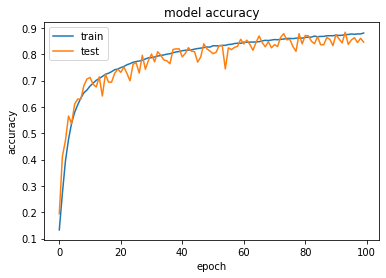

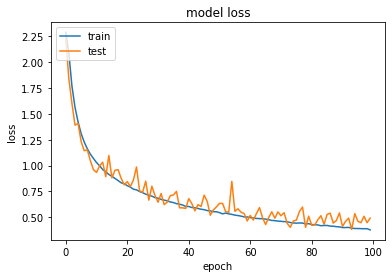

In [113]:
#summarize history for accuracy
plt.plot(history_final_20.history['accuracy'])
plt.plot(history_final_20.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_20.history['loss'])
plt.plot(history_final_20.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [114]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_RMSprop'], 'accuracy': [results20[1]]},index={'10'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1571   84    0   28   23   23   22   39    3   21]
 [  10 1685    5   25   34   13    8   41    5    2]
 [  17  111 1318   55   31   26    7  205    9   24]
 [  15  118   15 1293   14  169   10   68    8    9]
 [  18   84   14   26 1591   21   17   17    3   21]
 [  20   55    6   83   22 1511   26   19   11   15]
 [  51   76   10   23   75  122 1399   23   46    7]
 [  11  108   14   16   12   14    4 1621    3    5]
 [  37  136   13  105   27   98  101   26 1210   59]
 [  67   92   16   56   34   87    6   41   21 1384]]


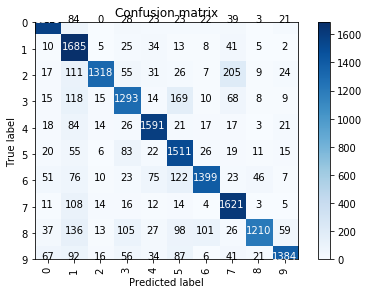

In [115]:
Y_pred_classes20 = np.argmax(Y_pred20,axis = 1) 
# Convert validation observations to one hot vectors
Y_true20 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx20 = confusion_matrix(Y_true20, Y_pred_classes20) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx20, classes = range(10)) 
print(confusion_mtx20)

In [116]:
print(classification_report(Y_true20, Y_pred_classes20, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.66      0.92      0.77      1828
           2       0.93      0.73      0.82      1803
           3       0.76      0.75      0.75      1719
           4       0.85      0.88      0.87      1812
           5       0.73      0.85      0.78      1768
           6       0.87      0.76      0.82      1832
           7       0.77      0.90      0.83      1808
           8       0.92      0.67      0.77      1812
           9       0.89      0.77      0.83      1804

   micro avg       0.80      0.80      0.80     16186
   macro avg       0.82      0.80      0.80     16186
weighted avg       0.82      0.80      0.80     16186



# MODEL21- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'he normal' & 3rd layer uniform

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated)

batch Size as 128 with 100 epoch.

In [117]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier
keras_model_21 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_21.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))

#Adding BatchNormalization Layer
keras_model_21.add(BatchNormalization())
keras_model_21.add(Activation('relu'))
keras_model_21.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_21.add(Dense(256, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_21.add(BatchNormalization())
#Adding Activation function
keras_model_21.add(Activation('relu'))
keras_model_21.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_21.add(Dense(128, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_21.add(BatchNormalization())
#Adding Activation function
keras_model_21.add(Activation('relu'))
keras_model_21.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_21.add(Dense(64, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_21.add(BatchNormalization())
#Adding Activation function
keras_model_21.add(Activation('relu'))
keras_model_21.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_21.add(Dense(32, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_21.add(BatchNormalization())
#Adding Activation function
keras_model_21.add(Activation('relu')) 
keras_model_21.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_21.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_21.add(Activation('softmax'))

In [118]:
keras_model_21.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [119]:
#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_21.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_21 = keras_model_21.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 40s 964us/step - loss: 2.3580 - accuracy: 0.1543 - val_loss: 2.1359 - val_accuracy: 0.2301
Epoch 2/100
42000/42000 [==============================] - 31s 732us/step - loss: 1.9239 - accuracy: 0.3385 - val_loss: 1.6964 - val_accuracy: 0.4865
Epoch 3/100
42000/42000 [==============================] - 31s 734us/step - loss: 1.6037 - accuracy: 0.4886 - val_loss: 1.4866 - val_accuracy: 0.5706
Epoch 4/100
42000/42000 [==============================] - 31s 741us/step - loss: 1.3991 - accuracy: 0.5703 - val_loss: 1.2504 - val_accuracy: 0.6553
Epoch 5/100
42000/42000 [==============================] - 31s 734us/step - loss: 1.2438 - accuracy: 0.6258 - val_loss: 1.1398 - val_accuracy: 0.6804
Epoch 6/100
42000/42000 [==============================] - 31s 736us/step - loss: 1.1312 - accuracy: 0.6639 - val_loss: 1.0453 - val_accuracy: 0.7075
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 31s 741us/step - loss: 0.3721 - accuracy: 0.8848 - val_loss: 0.5662 - val_accuracy: 0.8274
Epoch 56/100
42000/42000 [==============================] - 31s 736us/step - loss: 0.3724 - accuracy: 0.8845 - val_loss: 0.4473 - val_accuracy: 0.8606
Epoch 57/100
42000/42000 [==============================] - 31s 732us/step - loss: 0.3619 - accuracy: 0.8889 - val_loss: 0.5748 - val_accuracy: 0.8166
Epoch 58/100
42000/42000 [==============================] - 31s 731us/step - loss: 0.3645 - accuracy: 0.8860 - val_loss: 0.4935 - val_accuracy: 0.8468
Epoch 59/100
42000/42000 [==============================] - 31s 737us/step - loss: 0.3590 - accuracy: 0.8895 - val_loss: 0.4277 - val_accuracy: 0.8684
Epoch 60/100
42000/42000 [==============================] - 31s 729us/step - loss: 0.3729 - accuracy: 0.8851 - val_loss: 0.4124 - val_accuracy: 0.8715
Epoch 61/100
42000/42000 [==============================] - 31s 739us/step - loss: 0.3505 - ac

In [120]:
results21 = keras_model_21.evaluate(X_test, y_test)
print('Test Accuracy: ', results21[1])

18000/18000 [==============================] - 4s 240us/step
Test Accuracy:  0.7864999771118164


In [121]:
Y_pred21= keras_model_21.predict(X_test)

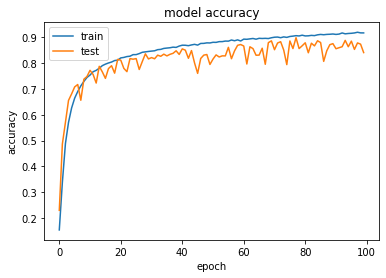

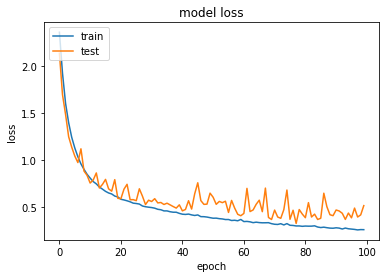

In [122]:
#summarize history for accuracy
plt.plot(history_21.history['accuracy'])
plt.plot(history_21.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_21.history['loss'])
plt.plot(history_21.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()





In [123]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_Dropout updated'], 'accuracy': [results21[1]]},index={'11'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1360   82    5   20    4    0  107   11  212   13]
 [   4 1627    2   15   13    4   18   18  125    2]
 [   6   67 1419   45   13   13    9   44  175   12]
 [   8   52   11 1357    6   42   18   17  197   11]
 [   5  151   15   25 1324   13   61   12  198    8]
 [   3   34    4  119    5 1208  128   11  239   17]
 [  15   56    4   13    8   22 1501    5  206    2]
 [   5  134   25   26    5    5   13 1501   92    2]
 [   5   36    5   26    5    9   63    7 1648    8]
 [  35   68    5   46    6   31   13   15  373 1212]]


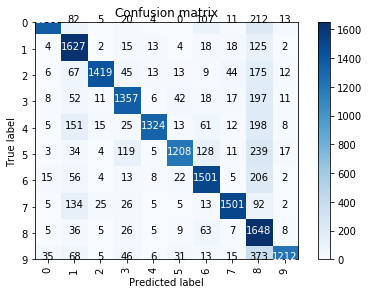

In [124]:
Y_pred_classes21 = np.argmax(Y_pred21,axis = 1) 
# Convert validation observations to one hot vectors
Y_true21 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx21 = confusion_matrix(Y_true21, Y_pred_classes21) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx21, classes = range(10)) 
print(confusion_mtx21)

In [125]:
print(classification_report(Y_true21, Y_pred_classes21, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79      1828
           2       0.95      0.79      0.86      1803
           3       0.80      0.79      0.80      1719
           4       0.95      0.73      0.83      1812
           5       0.90      0.68      0.78      1768
           6       0.78      0.82      0.80      1832
           7       0.91      0.83      0.87      1808
           8       0.48      0.91      0.62      1812
           9       0.94      0.67      0.78      1804

   micro avg       0.77      0.79      0.78     16186
   macro avg       0.82      0.79      0.79     16186
weighted avg       0.82      0.79      0.79     16186



In [225]:
# MODEL23- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 20 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

SyntaxError: invalid syntax (<ipython-input-225-1a51629a2ca1>, line 2)

In [126]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_23 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_23.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))

#Adding BatchNormalization Layer
keras_model_23.add(BatchNormalization())
keras_model_23.add(Activation('relu'))
keras_model_23.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_23.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_23.add(BatchNormalization())  
#Adding Activation function
keras_model_23.add(Activation('relu'))
keras_model_23.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_23.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_23.add(BatchNormalization())
#Adding Activation function
keras_model_23.add(Activation('relu'))
keras_model_23.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_23.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_23.add(BatchNormalization())
#Adding Activation function
keras_model_23.add(Activation('relu'))
keras_model_23.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_23.add(Dense(32, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_23.add(BatchNormalization())
#Adding Activation function
keras_model_23.add(Activation('relu')) 
keras_model_23.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_23.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_23.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_23.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_23 = keras_model_23.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 40s 948us/step - loss: 2.1604 - accuracy: 0.2240 - val_loss: 1.9062 - val_accuracy: 0.3234
Epoch 2/100
42000/42000 [==============================] - 32s 753us/step - loss: 1.6111 - accuracy: 0.4461 - val_loss: 1.5630 - val_accuracy: 0.4915
Epoch 3/100
42000/42000 [==============================] - 35s 842us/step - loss: 1.3123 - accuracy: 0.5714 - val_loss: 1.2986 - val_accuracy: 0.5711
Epoch 4/100
42000/42000 [==============================] - 31s 748us/step - loss: 1.1498 - accuracy: 0.6321 - val_loss: 1.1050 - val_accuracy: 0.6438
Epoch 5/100
42000/42000 [==============================] - 31s 743us/step - loss: 1.0512 - accuracy: 0.6713 - val_loss: 1.0867 - val_accuracy: 0.6523
Epoch 6/100
42000/42000 [==============================] - 31s 744us/step - loss: 0.9798 - accuracy: 0.6970 - val_loss: 0.8982 - val_accuracy: 0.7182
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 32s 770us/step - loss: 0.4854 - accuracy: 0.8555 - val_loss: 0.3370 - val_accuracy: 0.8998
Epoch 56/100
42000/42000 [==============================] - 32s 772us/step - loss: 0.4851 - accuracy: 0.8564 - val_loss: 0.3462 - val_accuracy: 0.8974
Epoch 57/100
42000/42000 [==============================] - 33s 777us/step - loss: 0.4784 - accuracy: 0.8592 - val_loss: 0.3396 - val_accuracy: 0.8999
Epoch 58/100
42000/42000 [==============================] - 33s 778us/step - loss: 0.4744 - accuracy: 0.8599 - val_loss: 0.3443 - val_accuracy: 0.8981
Epoch 59/100
42000/42000 [==============================] - 32s 774us/step - loss: 0.4792 - accuracy: 0.8603 - val_loss: 0.3421 - val_accuracy: 0.8981
Epoch 60/100
42000/42000 [==============================] - 32s 770us/step - loss: 0.4742 - accuracy: 0.8600 - val_loss: 0.3287 - val_accuracy: 0.9025
Epoch 61/100
42000/42000 [==============================] - 33s 782us/step - loss: 0.4681 - ac

In [129]:
keras_model_23.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [130]:
results23 = keras_model_23.evaluate(X_test, y_test)
print('Test Accuracy: ', results23[1])

18000/18000 [==============================] - 5s 289us/step
Test Accuracy:  0.8731666803359985


In [131]:
Y_pred23= keras_model_23.predict(X_test)

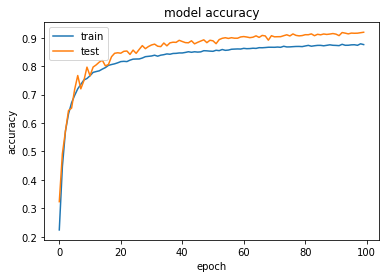

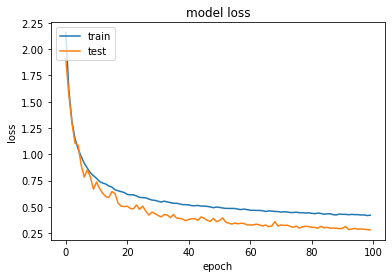

In [132]:
#summarize history for accuracy
plt.plot(history_final_23.history['accuracy'])
plt.plot(history_final_23.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_23.history['loss'])
plt.plot(history_final_23.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [133]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_lr parameters updated'], 'accuracy': [results23[1]]},index={'12'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1644   24   11   18   12   13   27   22   15   28]
 [  21 1607   19   36   39   20   16   49   15    6]
 [  13   19 1598   40   16   14    2   52   24   25]
 [   9   14   23 1468   10  107   17   25   32   14]
 [  17   43   24   23 1610   16   28   12   14   25]
 [  10    8   10   67    6 1566   49   11   26   15]
 [  30   19   13   20   18   72 1591    8   53    8]
 [   7   52   30   28    6   11   11 1647    6   10]
 [  21   28   24   63    9   43   94   11 1489   30]
 [  52   27   26   50   12   72    9   22   37 1497]]


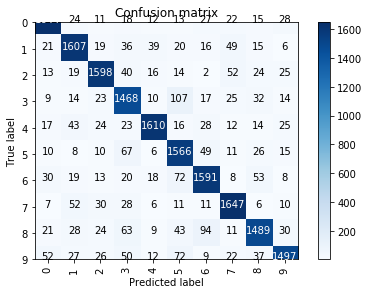

In [134]:
Y_pred_classes23 = np.argmax(Y_pred23,axis = 1) 
# Convert validation observations to one hot vectors
Y_true23 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx23 = confusion_matrix(Y_true23, Y_pred_classes23) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx23, classes = range(10)) 
print(confusion_mtx23)

In [135]:
print(classification_report(Y_true23, Y_pred_classes23, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.87      0.88      0.88      1828
           2       0.90      0.89      0.89      1803
           3       0.81      0.85      0.83      1719
           4       0.93      0.89      0.91      1812
           5       0.81      0.89      0.85      1768
           6       0.86      0.87      0.87      1832
           7       0.89      0.91      0.90      1808
           8       0.87      0.82      0.85      1812
           9       0.90      0.83      0.86      1804

   micro avg       0.87      0.87      0.87     16186
   macro avg       0.87      0.87      0.87     16186
weighted avg       0.87      0.87      0.87     16186



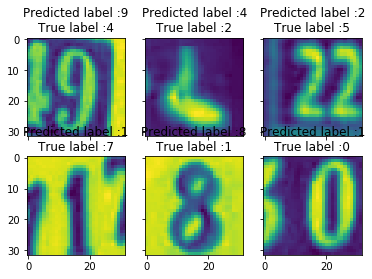

In [136]:
   
# Display some error results 

# Errors are difference between predicted labels and true labels
errors23 = (Y_pred_classes23 - Y_true23 != 0)

Y_pred_classes_errors23 = Y_pred_classes23[errors]
Y_pred_errors23 = Y_pred23[errors]
Y_true_errors23 = Y_true23[errors]
X_val_errors23 = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob23 = np.max(Y_pred_errors23,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors23 = np.diagonal(np.take(Y_pred_errors23, Y_true_errors23, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors23 = Y_pred_errors_prob23- true_prob_errors23

# Sorted list of the delta prob errors
sorted_dela_errors23 = np.argsort(delta_pred_true_errors23)

# Top 6 errors 
most_important_errors23 = sorted_dela_errors23[-6:]

# Show the top 6 errors
display_errors(most_important_errors23, X_val_errors23, Y_pred_classes_errors23, Y_true_errors23)

# MODEL24- 
Dense Layers as 192,160,128,64,48

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [137]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_24 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_24.add(Dense(192, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_24.add(BatchNormalization())
keras_model_24.add(Activation('relu'))
keras_model_24.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_24.add(Dense(160, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_24.add(BatchNormalization())  
#Adding Activation function
keras_model_24.add(Activation('relu'))
keras_model_24.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_24.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_24.add(BatchNormalization())
#Adding Activation function
keras_model_24.add(Activation('relu'))
keras_model_24.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_24.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_24.add(BatchNormalization())
#Adding Activation function
keras_model_24.add(Activation('relu'))
keras_model_24.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_24.add(Dense(48, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_24.add(BatchNormalization())
#Adding Activation function
keras_model_24.add(Activation('relu')) 
keras_model_24.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_24.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_24.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_24.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_24 = keras_model_24.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 41s 975us/step - loss: 1.9151 - accuracy: 0.3243 - val_loss: 1.7331 - val_accuracy: 0.3951
Epoch 2/100
42000/42000 [==============================] - 22s 536us/step - loss: 1.2797 - accuracy: 0.5843 - val_loss: 1.5969 - val_accuracy: 0.4693
Epoch 3/100
42000/42000 [==============================] - 24s 566us/step - loss: 1.0801 - accuracy: 0.6561 - val_loss: 1.5123 - val_accuracy: 0.5114
Epoch 4/100
42000/42000 [==============================] - 24s 562us/step - loss: 0.9733 - accuracy: 0.6904 - val_loss: 0.9899 - val_accuracy: 0.6816
Epoch 5/100
42000/42000 [==============================] - 25s 591us/step - loss: 0.8971 - accuracy: 0.7190 - val_loss: 1.0667 - val_accuracy: 0.6500
Epoch 6/100
42000/42000 [==============================] - 23s 549us/step - loss: 0.8393 - accuracy: 0.7381 - val_loss: 0.9003 - val_accuracy: 0.7099
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 23s 548us/step - loss: 0.4749 - accuracy: 0.8532 - val_loss: 0.3572 - val_accuracy: 0.8931
Epoch 56/100
42000/42000 [==============================] - 23s 549us/step - loss: 0.4672 - accuracy: 0.8553 - val_loss: 0.3604 - val_accuracy: 0.8922
Epoch 57/100
42000/42000 [==============================] - 23s 550us/step - loss: 0.4615 - accuracy: 0.8581 - val_loss: 0.3626 - val_accuracy: 0.8897
Epoch 58/100
42000/42000 [==============================] - 23s 548us/step - loss: 0.4720 - accuracy: 0.8538 - val_loss: 0.3661 - val_accuracy: 0.8882
Epoch 59/100
42000/42000 [==============================] - 23s 555us/step - loss: 0.4611 - accuracy: 0.8564 - val_loss: 0.3899 - val_accuracy: 0.8795
Epoch 60/100
42000/42000 [==============================] - 24s 565us/step - loss: 0.4613 - accuracy: 0.8569 - val_loss: 0.3825 - val_accuracy: 0.8839
Epoch 61/100
42000/42000 [==============================] - 23s 550us/step - loss: 0.4612 - ac

In [138]:
keras_model_24.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               196800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 192)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               30880     
_________________________________________________________________
batch_normalization_2 (Batch (None, 160)               640       
_________________________________________________________________
activation_2 (Activation)    (None, 160)              

In [139]:
results24 = keras_model_24.evaluate(X_test, y_test)
print('Test Accuracy: ', results24[1])

18000/18000 [==============================] - 4s 208us/step
Test Accuracy:  0.8647222518920898


In [140]:
Y_pred24= keras_model_24.predict(X_test)

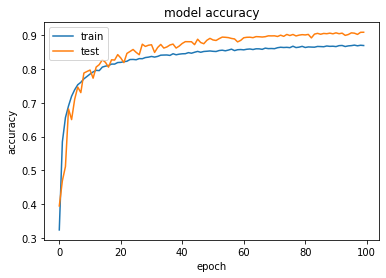

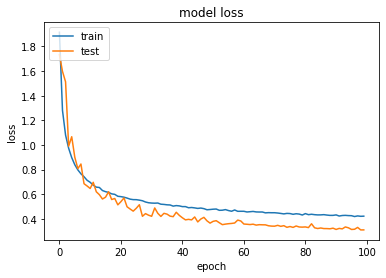

In [141]:
#summarize history for accuracy
plt.plot(history_final_24.history['accuracy'])
plt.plot(history_final_24.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_24.history['loss'])
plt.plot(history_final_24.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_hiddenlayers parameters updated'], 'accuracy': [results24[1]]},index={'13'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1617   37    9   20   19    3   13   20   18   58]
 [  15 1645   14   18   50    4   14   35   19   14]
 [  12   28 1586   29   24    8    2   52   29   33]
 [  16   45   52 1396   18   88   16   29   31   28]
 [  19   62   25   13 1618    5   16   10   13   31]
 [  14   18   14   68   14 1515   38   13   40   34]
 [  46   24   11   22   43   57 1532    8   68   21]
 [  13   69   35   17   10   10    5 1623    7   19]
 [  33   51   28   45   19   24   69   10 1478   55]
 [  46   38   23   30   17   32    7   23   33 1555]]


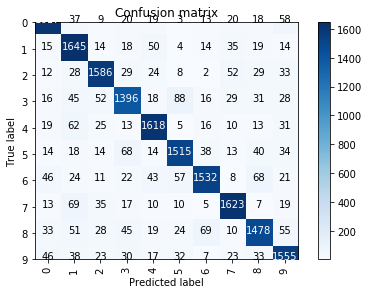

In [143]:
Y_pred_classes24 = np.argmax(Y_pred24,axis = 1) 
# Convert validation observations to one hot vectors
Y_true24 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx24 = confusion_matrix(Y_true24, Y_pred_classes24) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx24, classes = range(10)) 
print(confusion_mtx24)

In [144]:
print(classification_report(Y_true24, Y_pred_classes24, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86      1828
           2       0.88      0.88      0.88      1803
           3       0.84      0.81      0.83      1719
           4       0.88      0.89      0.89      1812
           5       0.87      0.86      0.86      1768
           6       0.89      0.84      0.86      1832
           7       0.89      0.90      0.89      1808
           8       0.85      0.82      0.83      1812
           9       0.84      0.86      0.85      1804

   micro avg       0.86      0.86      0.86     16186
   macro avg       0.86      0.86      0.86     16186
weighted avg       0.86      0.86      0.86     16186



# MODEL25- 
Dense Layers as 192,192,160,128,64,48

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [145]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_25 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_25.add(Dense(192, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization())
keras_model_25.add(Activation('relu'))
keras_model_25.add(Dropout(0.1))


#Hidden Layer 1
#Adding first Hidden layer
keras_model_25.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization())  
#Adding Activation function
keras_model_25.add(Activation('relu'))
keras_model_25.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_25.add(Dense(160, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization())  
#Adding Activation function
keras_model_25.add(Activation('relu'))
keras_model_25.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_25.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization())
#Adding Activation function
keras_model_25.add(Activation('relu'))
keras_model_25.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_25.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization()) 
#Adding Activation function
keras_model_25.add(Activation('relu'))
keras_model_25.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_25.add(Dense(48, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_25.add(BatchNormalization())
#Adding Activation function
keras_model_25.add(Activation('relu')) 
keras_model_25.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_25.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_25.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_25.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_25 = keras_model_25.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 41s 977us/step - loss: 2.0621 - accuracy: 0.2626 - val_loss: 1.9115 - val_accuracy: 0.3228
Epoch 2/100
42000/42000 [==============================] - 28s 663us/step - loss: 1.3935 - accuracy: 0.5340 - val_loss: 1.4283 - val_accuracy: 0.5074
Epoch 3/100
42000/42000 [==============================] - 27s 638us/step - loss: 1.1552 - accuracy: 0.6283 - val_loss: 1.1465 - val_accuracy: 0.6148
Epoch 4/100
42000/42000 [==============================] - 30s 725us/step - loss: 1.0260 - accuracy: 0.6789 - val_loss: 1.2023 - val_accuracy: 0.6082
Epoch 5/100
42000/42000 [==============================] - 28s 674us/step - loss: 0.9400 - accuracy: 0.7075 - val_loss: 1.0809 - val_accuracy: 0.6531
Epoch 6/100
42000/42000 [==============================] - 27s 638us/step - loss: 0.8759 - accuracy: 0.7255 - val_loss: 0.8749 - val_accuracy: 0.7173
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 27s 653us/step - loss: 0.4746 - accuracy: 0.8533 - val_loss: 0.3564 - val_accuracy: 0.8924
Epoch 56/100
42000/42000 [==============================] - 27s 648us/step - loss: 0.4749 - accuracy: 0.8520 - val_loss: 0.3574 - val_accuracy: 0.8920
Epoch 57/100
42000/42000 [==============================] - 28s 670us/step - loss: 0.4761 - accuracy: 0.8549 - val_loss: 0.3660 - val_accuracy: 0.8897
Epoch 58/100
42000/42000 [==============================] - 27s 653us/step - loss: 0.4711 - accuracy: 0.8551 - val_loss: 0.3523 - val_accuracy: 0.8939
Epoch 59/100
42000/42000 [==============================] - 27s 653us/step - loss: 0.4695 - accuracy: 0.8562 - val_loss: 0.4104 - val_accuracy: 0.8729
Epoch 60/100
42000/42000 [==============================] - 28s 666us/step - loss: 0.4711 - accuracy: 0.8553 - val_loss: 0.3709 - val_accuracy: 0.8871
Epoch 61/100
42000/42000 [==============================] - 28s 671us/step - loss: 0.4647 - ac

In [146]:
keras_model_25.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               196800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 192)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_2 (Batch (None, 192)               768       
_________________________________________________________________
activation_2 (Activation)    (None, 192)              

In [147]:
results25 = keras_model_25.evaluate(X_test, y_test)
print('Test Accuracy: ', results25[1])

18000/18000 [==============================] - 4s 234us/step
Test Accuracy:  0.8588333129882812


In [148]:
Y_pred25= keras_model_25.predict(X_test)

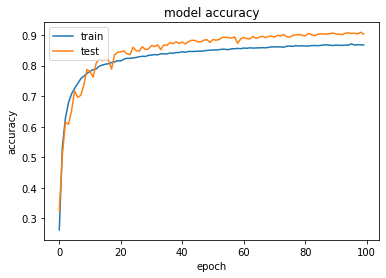

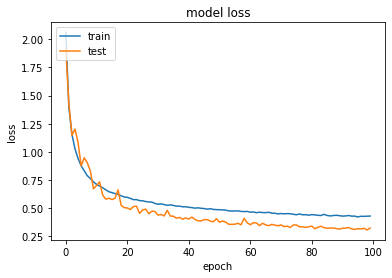

In [149]:
#summarize history for accuracy
plt.plot(history_final_25.history['accuracy'])
plt.plot(history_final_25.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_25.history['loss'])
plt.plot(history_final_25.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()





In [150]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_hiddenlayers parameters updated_1'], 'accuracy': [results25[1]]},index={'14'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1556   53   23   21   35    3   25   35   22   41]
 [  15 1648   18   19   40    6   11   49   16    6]
 [   7   28 1605   20   32   12    5   58   16   20]
 [   7   57   55 1391   24   87   11   42   30   15]
 [  14   56   22   13 1646    6   12   15    7   21]
 [   9   18   18  100   21 1461   50   17   46   28]
 [  29   31   17   20   49   54 1523   14   84   11]
 [   8   71   32   14   11    6    4 1647    8    7]
 [  15   51   33   46   30   17   68   15 1502   35]
 [  42   44   39   42   31   36    8   27   55 1480]]


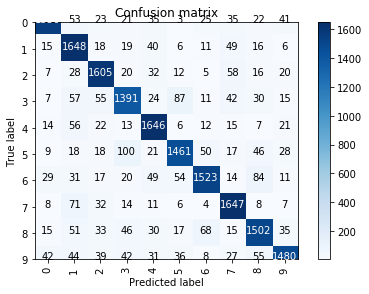

In [151]:
Y_pred_classes25 = np.argmax(Y_pred25,axis = 1) 
# Convert validation observations to one hot vectors
Y_true25 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx25 = confusion_matrix(Y_true25, Y_pred_classes25) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx25, classes = range(10)) 
print(confusion_mtx25)

In [152]:
print(classification_report(Y_true25, Y_pred_classes25, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85      1828
           2       0.86      0.89      0.88      1803
           3       0.83      0.81      0.82      1719
           4       0.86      0.91      0.88      1812
           5       0.87      0.83      0.85      1768
           6       0.89      0.83      0.86      1832
           7       0.86      0.91      0.88      1808
           8       0.84      0.83      0.83      1812
           9       0.89      0.82      0.85      1804

   micro avg       0.85      0.86      0.86     16186
   macro avg       0.85      0.86      0.86     16186
weighted avg       0.85      0.86      0.86     16186



# MODEL26- 
Dense Layers as 192,192,192,160,128,64,48

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [153]:
keras.backend.clear_session()
# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_26 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_26.add(Dense(192, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))


#Hidden Layer 1
#Adding first Hidden layer
keras_model_26.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())  
#Adding Activation function
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_26.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())  
#Adding Activation function
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))



#Hidden Layer 1
#Adding first Hidden layer
keras_model_26.add(Dense(160, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())  
#Adding Activation function
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_26.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())
#Adding Activation function
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_26.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization()) 
#Adding Activation function
keras_model_26.add(Activation('relu'))
keras_model_26.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_26.add(Dense(48, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_26.add(BatchNormalization())
#Adding Activation function
keras_model_26.add(Activation('relu')) 
keras_model_26.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_26.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_26.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_26.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_26 = keras_model_26.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 54s 1ms/step - loss: 2.1187 - accuracy: 0.2367 - val_loss: 2.1986 - val_accuracy: 0.2397
Epoch 2/100
42000/42000 [==============================] - 31s 744us/step - loss: 1.4421 - accuracy: 0.5098 - val_loss: 1.3603 - val_accuracy: 0.5362
Epoch 3/100
42000/42000 [==============================] - 30s 724us/step - loss: 1.1970 - accuracy: 0.6119 - val_loss: 1.0923 - val_accuracy: 0.6532
Epoch 4/100
42000/42000 [==============================] - 30s 723us/step - loss: 1.0640 - accuracy: 0.6663 - val_loss: 1.1576 - val_accuracy: 0.6283
Epoch 5/100
42000/42000 [==============================] - 31s 739us/step - loss: 0.9795 - accuracy: 0.6948 - val_loss: 1.0889 - val_accuracy: 0.6536
Epoch 6/100
42000/42000 [==============================] - 31s 728us/step - loss: 0.9178 - accuracy: 0.7147 - val_loss: 0.8423 - val_accuracy: 0.7353
Epoch 7/100
42000/42000 [===========================

Epoch 55/100
42000/42000 [==============================] - 31s 742us/step - loss: 0.4928 - accuracy: 0.8485 - val_loss: 0.3777 - val_accuracy: 0.8854
Epoch 56/100
42000/42000 [==============================] - 31s 731us/step - loss: 0.4909 - accuracy: 0.8499 - val_loss: 0.3706 - val_accuracy: 0.8888
Epoch 57/100
42000/42000 [==============================] - 30s 723us/step - loss: 0.4939 - accuracy: 0.8482 - val_loss: 0.3804 - val_accuracy: 0.8851
Epoch 58/100
42000/42000 [==============================] - 32s 752us/step - loss: 0.4908 - accuracy: 0.8495 - val_loss: 0.3745 - val_accuracy: 0.8881
Epoch 59/100
42000/42000 [==============================] - 33s 778us/step - loss: 0.4896 - accuracy: 0.8513 - val_loss: 0.3829 - val_accuracy: 0.8837
Epoch 60/100
42000/42000 [==============================] - 32s 754us/step - loss: 0.4945 - accuracy: 0.8489 - val_loss: 0.3568 - val_accuracy: 0.8934
Epoch 61/100
42000/42000 [==============================] - 32s 753us/step - loss: 0.4822 - ac

In [154]:
keras_model_26.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               196800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 192)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_2 (Batch (None, 192)               768       
_________________________________________________________________
activation_2 (Activation)    (None, 192)              

In [155]:
results26 = keras_model_26.evaluate(X_test, y_test)
print('Test Accuracy: ', results26[1])

18000/18000 [==============================] - 5s 289us/step
Test Accuracy:  0.862666666507721


In [156]:
Y_pred26= keras_model_26.predict(X_test)

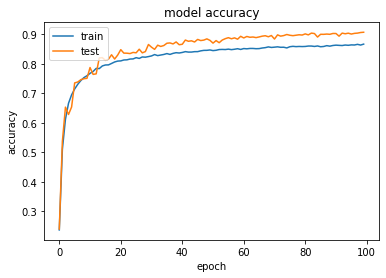

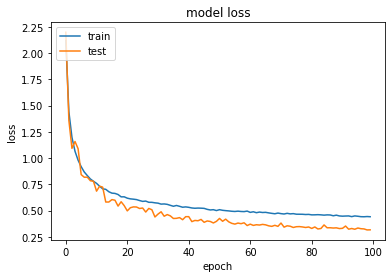

In [157]:
#summarize history for accuracy
plt.plot(history_final_26.history['accuracy'])
plt.plot(history_final_26.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_26.history['loss'])
plt.plot(history_final_26.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [158]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_hiddenlayers parameters updated_2'], 'accuracy': [results26[1]]},index={'15'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1628   27   10   16   21    4   28   20   12   48]
 [  26 1590   26   33   44   21   14   52   12   10]
 [  15   19 1561   41   20   13    9   56   18   51]
 [  11   26   44 1398   11  119   18   33   35   24]
 [  25   41   22   15 1608   12   33   12   14   30]
 [  12   10   14   69   11 1549   40   10   30   23]
 [  36   22   12   18   31   84 1560   11   42   16]
 [  15   43   40   25    8   11    4 1634    9   19]
 [  24   32   30   39   12   49   82   10 1473   61]
 [  66   21   22   30   16   52    8   26   36 1527]]


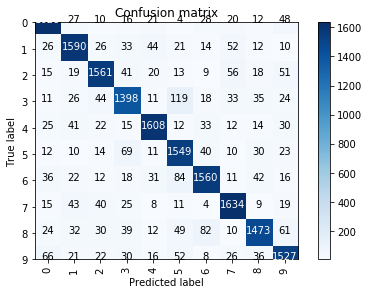

In [159]:
Y_pred_classes26 = np.argmax(Y_pred26,axis = 1) 
# Convert validation observations to one hot vectors
Y_true26 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx26 = confusion_matrix(Y_true26, Y_pred_classes26) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx26, classes = range(10)) 
print(confusion_mtx26)

In [160]:
from sklearn.metrics import classification_report

In [161]:
print(classification_report(Y_true26, Y_pred_classes26, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87      1828
           2       0.88      0.87      0.87      1803
           3       0.83      0.81      0.82      1719
           4       0.90      0.89      0.89      1812
           5       0.81      0.88      0.84      1768
           6       0.87      0.85      0.86      1832
           7       0.88      0.90      0.89      1808
           8       0.88      0.81      0.84      1812
           9       0.84      0.85      0.85      1804

   micro avg       0.86      0.86      0.86     16186
   macro avg       0.86      0.86      0.86     16186
weighted avg       0.86      0.86      0.86     16186



# MODEL27- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [162]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_27 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_27.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_27.add(BatchNormalization())
keras_model_27.add(Activation('relu'))
keras_model_27.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_27.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_27.add(BatchNormalization())  
#Adding Activation function
keras_model_27.add(Activation('relu'))
keras_model_27.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_27.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_27.add(BatchNormalization())
#Adding Activation function
keras_model_27.add(Activation('relu'))
keras_model_27.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_27.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_27.add(BatchNormalization())
#Adding Activation function
keras_model_27.add(Activation('relu'))
keras_model_27.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_27.add(Dense(32, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_27.add(BatchNormalization())
#Adding Activation function
keras_model_27.add(Activation('relu')) 
keras_model_27.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_27.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_27.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_27.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_27 = keras_model_27.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 42s 1ms/step - loss: 1.8810 - accuracy: 0.3458 - val_loss: 1.8008 - val_accuracy: 0.3916
Epoch 2/100
42000/42000 [==============================] - 33s 775us/step - loss: 1.2198 - accuracy: 0.6126 - val_loss: 1.4516 - val_accuracy: 0.5355
Epoch 3/100
42000/42000 [==============================] - 32s 772us/step - loss: 0.9925 - accuracy: 0.6892 - val_loss: 1.1450 - val_accuracy: 0.6225
Epoch 4/100
42000/42000 [==============================] - 33s 783us/step - loss: 0.8771 - accuracy: 0.7260 - val_loss: 1.0529 - val_accuracy: 0.6629
Epoch 5/100
42000/42000 [==============================] - 33s 774us/step - loss: 0.8026 - accuracy: 0.7509 - val_loss: 0.8839 - val_accuracy: 0.7201
Epoch 6/100
42000/42000 [==============================] - 33s 778us/step - loss: 0.7470 - accuracy: 0.7693 - val_loss: 0.7425 - val_accuracy: 0.7620
Epoch 7/100
42000/42000 [===========================

Epoch 55/100
42000/42000 [==============================] - 31s 748us/step - loss: 0.3319 - accuracy: 0.8983 - val_loss: 0.2859 - val_accuracy: 0.9152
Epoch 56/100
42000/42000 [==============================] - 31s 740us/step - loss: 0.3267 - accuracy: 0.8978 - val_loss: 0.2585 - val_accuracy: 0.9251
Epoch 57/100
42000/42000 [==============================] - 31s 740us/step - loss: 0.3357 - accuracy: 0.8979 - val_loss: 0.2752 - val_accuracy: 0.9195
Epoch 58/100
42000/42000 [==============================] - 31s 742us/step - loss: 0.3257 - accuracy: 0.8991 - val_loss: 0.2804 - val_accuracy: 0.9178
Epoch 59/100
42000/42000 [==============================] - 31s 743us/step - loss: 0.3211 - accuracy: 0.9012 - val_loss: 0.2935 - val_accuracy: 0.9119
Epoch 60/100
42000/42000 [==============================] - 31s 742us/step - loss: 0.3170 - accuracy: 0.9019 - val_loss: 0.2670 - val_accuracy: 0.9228
Epoch 61/100
42000/42000 [==============================] - 31s 749us/step - loss: 0.3172 - ac

In [163]:
keras_model_27.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [164]:
results27 = keras_model_27.evaluate(X_test, y_test)
print('Test Accuracy: ', results27[1])

18000/18000 [==============================] - 4s 247us/step
Test Accuracy:  0.8638888597488403


In [165]:
Y_pred27= keras_model_27.predict(X_test)

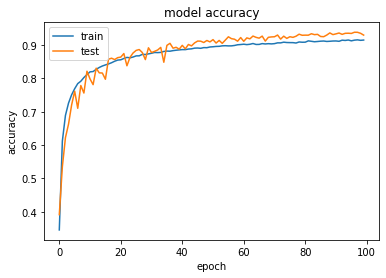

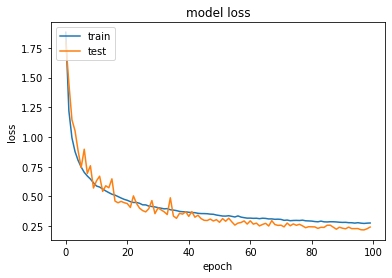

In [166]:
#summarize history for accuracy
plt.plot(history_final_27.history['accuracy'])
plt.plot(history_final_27.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_27.history['loss'])
plt.plot(history_final_27.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [167]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_Batch_dropout and hidden layers updated '], 'accuracy': [results27[1]]},index={'16'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1590   43    4   20   17    8   58   15   27   32]
 [  11 1664    7   26   32   15   23   24   19    7]
 [  10   46 1532   43   17   20   11   55   37   32]
 [   8   43   16 1357    8  171   26   24   51   15]
 [  13   61   11   17 1610   18   43    8   18   13]
 [   8   12    7   47    5 1585   60    4   31    9]
 [  19   17    7   13   20   78 1626   10   39    3]
 [   7   91   14   17   16   14   14 1620    7    8]
 [  13   36    8   31   11   50  131    7 1503   22]
 [  38   47   13   33   13   92   20   18   67 1463]]


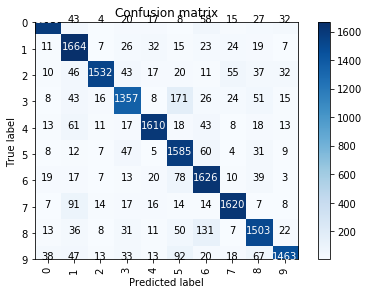

In [168]:
Y_pred_classes27 = np.argmax(Y_pred27,axis = 1) 
# Convert validation observations to one hot vectors
Y_true27 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx27 = confusion_matrix(Y_true27, Y_pred_classes27) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx27, classes = range(10)) 
print(confusion_mtx27)

In [169]:
print(classification_report(Y_true27, Y_pred_classes27, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.81      0.91      0.86      1828
           2       0.95      0.85      0.90      1803
           3       0.85      0.79      0.82      1719
           4       0.92      0.89      0.90      1812
           5       0.77      0.90      0.83      1768
           6       0.81      0.89      0.85      1832
           7       0.91      0.90      0.90      1808
           8       0.84      0.83      0.83      1812
           9       0.91      0.81      0.86      1804

   micro avg       0.86      0.86      0.86     16186
   macro avg       0.86      0.86      0.86     16186
weighted avg       0.86      0.86      0.86     16186



# MODEL28- 
Dense Layers as 192,192,192,192,,160,128,64,48

Kernel Initiaizer as 'he normal'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [170]:
tf.keras.backend.clear_session()
# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_28 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_28.add(Dense(192, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))


#Hidden Layer 1
#Adding first Hidden layer
keras_model_28.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())  
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_28.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())  
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))



#Hidden Layer 1
#Adding first Hidden layer
keras_model_28.add(Dense(192, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())  
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))



#Hidden Layer 1
#Adding first Hidden layer
keras_model_28.add(Dense(160, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())  
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_28.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_28.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization()) 
#Adding Activation function
keras_model_28.add(Activation('relu'))
keras_model_28.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_28.add(Dense(48, kernel_initializer='he_normal',))
#Adding BatchNormalization Layer
keras_model_28.add(BatchNormalization())
#Adding Activation function
keras_model_28.add(Activation('relu')) 
keras_model_28.add(Dropout(0.1))
 
# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_28.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_28.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_28.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_28 = keras_model_28.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 55s 1ms/step - loss: 2.2655 - accuracy: 0.1665 - val_loss: 2.1667 - val_accuracy: 0.1912
Epoch 2/100
42000/42000 [==============================] - 33s 796us/step - loss: 1.6405 - accuracy: 0.4249 - val_loss: 1.4961 - val_accuracy: 0.4786
Epoch 3/100
42000/42000 [==============================] - 35s 833us/step - loss: 1.3107 - accuracy: 0.5651 - val_loss: 1.3682 - val_accuracy: 0.5261
Epoch 4/100
42000/42000 [==============================] - 34s 801us/step - loss: 1.1705 - accuracy: 0.6228 - val_loss: 1.2022 - val_accuracy: 0.6005
Epoch 5/100
42000/42000 [==============================] - 34s 798us/step - loss: 1.0500 - accuracy: 0.6700 - val_loss: 1.0782 - val_accuracy: 0.6423
Epoch 6/100
42000/42000 [==============================] - 34s 810us/step - loss: 0.9717 - accuracy: 0.6968 - val_loss: 0.9742 - val_accuracy: 0.6828
Epoch 7/100
42000/42000 [===========================

Epoch 55/100
42000/42000 [==============================] - 34s 802us/step - loss: 0.5085 - accuracy: 0.8477 - val_loss: 0.3916 - val_accuracy: 0.8816
Epoch 56/100
42000/42000 [==============================] - 35s 835us/step - loss: 0.4997 - accuracy: 0.8491 - val_loss: 0.3845 - val_accuracy: 0.8836
Epoch 57/100
42000/42000 [==============================] - 34s 804us/step - loss: 0.5076 - accuracy: 0.8457 - val_loss: 0.3776 - val_accuracy: 0.8859
Epoch 58/100
42000/42000 [==============================] - 34s 813us/step - loss: 0.4988 - accuracy: 0.8477 - val_loss: 0.3770 - val_accuracy: 0.8858
Epoch 59/100
42000/42000 [==============================] - 34s 801us/step - loss: 0.4998 - accuracy: 0.8486 - val_loss: 0.3722 - val_accuracy: 0.8875
Epoch 60/100
42000/42000 [==============================] - 34s 800us/step - loss: 0.4986 - accuracy: 0.8488 - val_loss: 0.3734 - val_accuracy: 0.8874
Epoch 61/100
42000/42000 [==============================] - 34s 808us/step - loss: 0.4934 - ac

In [171]:
keras_model_28.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               196800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 192)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_2 (Batch (None, 192)               768       
_________________________________________________________________
activation_2 (Activation)    (None, 192)              

In [172]:
results28 = keras_model_28.evaluate(X_test, y_test)
print('Test Accuracy: ', results28[1])

18000/18000 [==============================] - 6s 308us/step
Test Accuracy:  0.8541666865348816


In [173]:
Y_pred28= keras_model_28.predict(X_test)

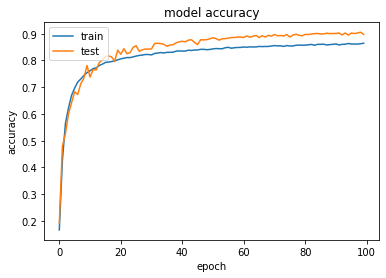

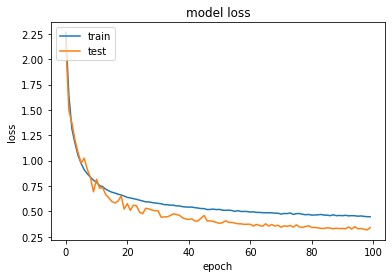

In [174]:
#summarize history for accuracy
plt.plot(history_final_28.history['accuracy'])
plt.plot(history_final_28.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_28.history['loss'])
plt.plot(history_final_28.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [175]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ hidden layers updated '], 'accuracy': [results28[1]]},index={'17'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1581   32   12   25   16    8   44   38   30   28]
 [  15 1615   17   29   41    6   14   67   19    5]
 [  14   25 1549   24   23   15    6  100   29   18]
 [   8   34   42 1388   16  103   24   49   45   10]
 [  20   48   23   11 1609   12   37   17   15   20]
 [   6   17   15  112    7 1455   81   16   45   14]
 [  21   22   10   19   34   45 1593   19   61    8]
 [   6   41   20   14   11    8   13 1680    7    8]
 [  19   28   19   58   15   28  113   25 1489   18]
 [  53   37   21   56   24   57   16   57   67 1416]]


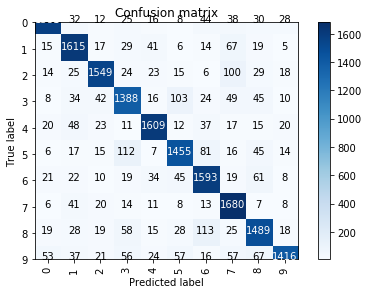

In [176]:
Y_pred_classes28 = np.argmax(Y_pred28,axis = 1) 
# Convert validation observations to one hot vectors
Y_true28 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx28 = confusion_matrix(Y_true28, Y_pred_classes28) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx28, classes = range(10)) 
print(confusion_mtx28)

In [177]:
print(classification_report(Y_true28, Y_pred_classes28, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.85      0.88      0.87      1828
           2       0.90      0.86      0.88      1803
           3       0.80      0.81      0.80      1719
           4       0.90      0.89      0.89      1812
           5       0.84      0.82      0.83      1768
           6       0.82      0.87      0.84      1832
           7       0.81      0.93      0.87      1808
           8       0.82      0.82      0.82      1812
           9       0.92      0.78      0.85      1804

   micro avg       0.85      0.85      0.85     16186
   macro avg       0.85      0.85      0.85     16186
weighted avg       0.85      0.85      0.85     16186



# MODEL29- 
Dense Layers as 192,192,192,192,160,128,64,48

Kernel Initiaizer as 'uniform'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [178]:
tf.keras.backend.clear_session()
# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_29 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_29.add(Dense(192, kernel_initializer='uniform',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))


#Hidden Layer 1
#Adding first Hidden layer
keras_model_29.add(Dense(192, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())  
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_29.add(Dense(192, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())  
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))



#Hidden Layer 1
#Adding first Hidden layer
keras_model_29.add(Dense(192, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())  
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))



#Hidden Layer 1
#Adding first Hidden layer
keras_model_29.add(Dense(160, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())  
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_29.add(Dense(128, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_29.add(Dense(64, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization()) 
#Adding Activation function
keras_model_29.add(Activation('relu'))
keras_model_29.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_29.add(Dense(48, kernel_initializer='uniform',))
#Adding BatchNormalization Layer
keras_model_29.add(BatchNormalization())
#Adding Activation function
keras_model_29.add(Activation('relu')) 
keras_model_29.add(Dropout(0.1))
 
# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_29.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_29.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_29.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_29 = keras_model_29.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 51s 1ms/step - loss: 1.9701 - accuracy: 0.2765 - val_loss: 2.6535 - val_accuracy: 0.1612
Epoch 2/100
42000/42000 [==============================] - 34s 820us/step - loss: 1.3481 - accuracy: 0.5477 - val_loss: 1.4504 - val_accuracy: 0.5084
Epoch 3/100
42000/42000 [==============================] - 34s 802us/step - loss: 1.1339 - accuracy: 0.6408 - val_loss: 1.2816 - val_accuracy: 0.5773
Epoch 4/100
42000/42000 [==============================] - 34s 800us/step - loss: 1.0020 - accuracy: 0.6920 - val_loss: 0.9960 - val_accuracy: 0.6749
Epoch 5/100
42000/42000 [==============================] - 34s 815us/step - loss: 0.9097 - accuracy: 0.7201 - val_loss: 0.9788 - val_accuracy: 0.6872
Epoch 6/100
42000/42000 [==============================] - 34s 800us/step - loss: 0.8405 - accuracy: 0.7430 - val_loss: 0.9764 - val_accuracy: 0.6926
Epoch 7/100
42000/42000 [===========================

Epoch 55/100
42000/42000 [==============================] - 34s 806us/step - loss: 0.4052 - accuracy: 0.8764 - val_loss: 0.3275 - val_accuracy: 0.9008
Epoch 56/100
42000/42000 [==============================] - 34s 799us/step - loss: 0.3982 - accuracy: 0.8779 - val_loss: 0.3158 - val_accuracy: 0.9047
Epoch 57/100
42000/42000 [==============================] - 34s 803us/step - loss: 0.4038 - accuracy: 0.8765 - val_loss: 0.3394 - val_accuracy: 0.8981
Epoch 58/100
42000/42000 [==============================] - 34s 817us/step - loss: 0.4025 - accuracy: 0.8760 - val_loss: 0.3054 - val_accuracy: 0.9086
Epoch 59/100
42000/42000 [==============================] - 34s 821us/step - loss: 0.3937 - accuracy: 0.8796 - val_loss: 0.3384 - val_accuracy: 0.8973
Epoch 60/100
42000/42000 [==============================] - 34s 811us/step - loss: 0.3932 - accuracy: 0.8803 - val_loss: 0.3045 - val_accuracy: 0.9097
Epoch 61/100
42000/42000 [==============================] - 34s 802us/step - loss: 0.3926 - ac

In [179]:
keras_model_29.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               196800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 192)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_2 (Batch (None, 192)               768       
_________________________________________________________________
activation_2 (Activation)    (None, 192)              

In [180]:
results29 = keras_model_29.evaluate(X_test, y_test)
print('Test Accuracy: ', results29[1])

18000/18000 [==============================] - 6s 335us/step
Test Accuracy:  0.8700555562973022


In [181]:
Y_pred29= keras_model_29.predict(X_test)

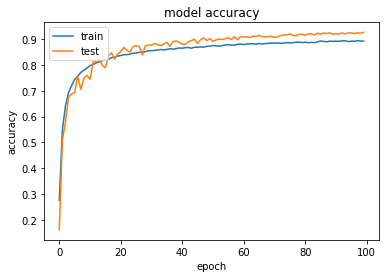

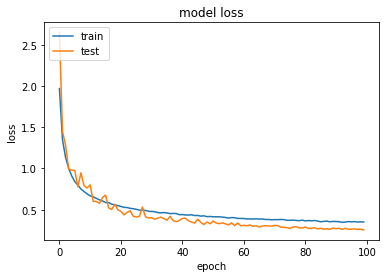

In [182]:
#summarize history for accuracy
plt.plot(history_final_29.history['accuracy'])
plt.plot(history_final_29.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_29.history['loss'])
plt.plot(history_final_29.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [183]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ kernel init uodated '], 'accuracy': [results29[1]]},index={'18'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1646   26    7   19   15    0   28   19   11   43]
 [  23 1616   13   35   39   15   13   44   16   14]
 [  12   20 1565   40   17   15    9   60   20   45]
 [  13   23   32 1423   15  116   20   25   29   23]
 [  21   48   18   21 1621   16   17   12   13   25]
 [  13    8    8   72    7 1525   58   14   37   26]
 [  30   19   10   15   24   53 1597   15   52   17]
 [  12   48   29   26   11    9    7 1642    9   15]
 [  26   28   19   50   18   37   90    8 1482   54]
 [  53   19   26   31   18   48   15   26   24 1544]]


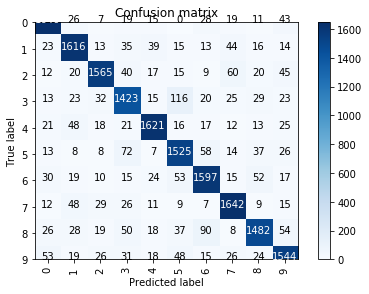

In [184]:
Y_pred_classes29 = np.argmax(Y_pred29,axis = 1) 
# Convert validation observations to one hot vectors
Y_true29 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx29 = confusion_matrix(Y_true29, Y_pred_classes29) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx29, classes = range(10)) 
print(confusion_mtx29)

In [185]:
print(classification_report(Y_true29, Y_pred_classes29, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.87      0.88      0.88      1828
           2       0.91      0.87      0.89      1803
           3       0.82      0.83      0.82      1719
           4       0.91      0.89      0.90      1812
           5       0.83      0.86      0.85      1768
           6       0.86      0.87      0.87      1832
           7       0.88      0.91      0.89      1808
           8       0.88      0.82      0.85      1812
           9       0.85      0.86      0.86      1804

   micro avg       0.87      0.87      0.87     16186
   macro avg       0.87      0.87      0.87     16186
weighted avg       0.87      0.87      0.87     16186



# MODEL30- 
Dense Layers as 512,256,128,64,32

Kernel Initiaizer as 'uniform'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [186]:
tf.keras.backend.clear_session()

# Input Layer
##Initialize the Artificial Neural Network Classifier     
keras_model_30 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_30.add(Dense(512, kernel_initializer='uniform',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_30.add(BatchNormalization())
keras_model_30.add(Activation('relu'))
keras_model_30.add(Dropout(0.1))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_30.add(Dense(256, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_30.add(BatchNormalization())  
#Adding Activation function
keras_model_30.add(Activation('relu'))
keras_model_30.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_30.add(Dense(128, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_30.add(BatchNormalization())
#Adding Activation function
keras_model_30.add(Activation('relu'))
keras_model_30.add(Dropout(0.1))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_30.add(Dense(64, kernel_initializer='uniform'))
#Adding BatchNormalization Layer
keras_model_30.add(BatchNormalization())
#Adding Activation function
keras_model_30.add(Activation('relu'))
keras_model_30.add(Dropout(0.1))

#Hidden Layer 4
#Adding fourth Hidden layer 
keras_model_30.add(Dense(32, kernel_initializer='uniform',))
#Adding BatchNormalization Layer
keras_model_30.add(BatchNormalization())
#Adding Activation function
keras_model_30.add(Activation('relu')) 
keras_model_30.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_30.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_30.add(Activation('softmax'))


#Setting the learning rate in sgd
adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_30.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training data
history_final_30 = keras_model_30.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 46s 1ms/step - loss: 1.6979 - accuracy: 0.4208 - val_loss: 1.8595 - val_accuracy: 0.3500
Epoch 2/100
42000/42000 [==============================] - 33s 797us/step - loss: 1.1205 - accuracy: 0.6463 - val_loss: 1.2595 - val_accuracy: 0.5875
Epoch 3/100
42000/42000 [==============================] - 32s 772us/step - loss: 0.9360 - accuracy: 0.7111 - val_loss: 1.0453 - val_accuracy: 0.6652
Epoch 4/100
42000/42000 [==============================] - 33s 792us/step - loss: 0.8454 - accuracy: 0.7380 - val_loss: 0.9947 - val_accuracy: 0.6775
Epoch 5/100
42000/42000 [==============================] - 32s 774us/step - loss: 0.7630 - accuracy: 0.7646 - val_loss: 0.8617 - val_accuracy: 0.7266
Epoch 6/100
42000/42000 [==============================] - 32s 772us/step - loss: 0.7065 - accuracy: 0.7820 - val_loss: 0.7882 - val_accuracy: 0.7463
Epoch 7/100
42000/42000 [===========================

Epoch 55/100
42000/42000 [==============================] - 33s 795us/step - loss: 0.2771 - accuracy: 0.9158 - val_loss: 0.2500 - val_accuracy: 0.9286
Epoch 56/100
42000/42000 [==============================] - 34s 816us/step - loss: 0.2775 - accuracy: 0.9137 - val_loss: 0.2716 - val_accuracy: 0.9194
Epoch 57/100
42000/42000 [==============================] - 34s 798us/step - loss: 0.2734 - accuracy: 0.9159 - val_loss: 0.3031 - val_accuracy: 0.9126
Epoch 58/100
42000/42000 [==============================] - 34s 813us/step - loss: 0.2775 - accuracy: 0.9143 - val_loss: 0.2688 - val_accuracy: 0.9216
Epoch 59/100
42000/42000 [==============================] - 34s 805us/step - loss: 0.2650 - accuracy: 0.9183 - val_loss: 0.2402 - val_accuracy: 0.9312
Epoch 60/100
42000/42000 [==============================] - 34s 814us/step - loss: 0.2658 - accuracy: 0.9182 - val_loss: 0.2495 - val_accuracy: 0.9275
Epoch 61/100
42000/42000 [==============================] - 35s 829us/step - loss: 0.2716 - ac

In [187]:
keras_model_30.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [188]:
results30 = keras_model_30.evaluate(X_test, y_test)
print('Test Accuracy: ', results30[1])

18000/18000 [==============================] - 5s 295us/step
Test Accuracy:  0.8723333477973938


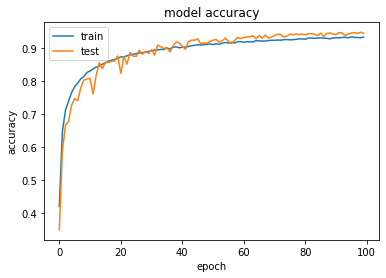

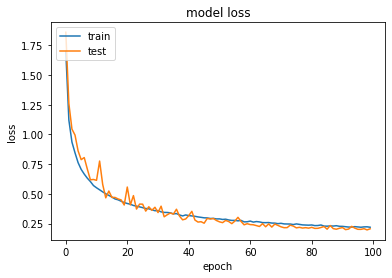

In [189]:
Y_pred30= keras_model_30.predict(X_test)
#summarize history for accuracy
plt.plot(history_final_30.history['accuracy'])
plt.plot(history_final_30.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_30.history['loss'])
plt.plot(history_final_30.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [190]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ kernel init uodated_1 '], 'accuracy': [results30[1]]},index={'19'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1569   29   11   35   24    6   31   17   50   42]
 [  15 1615   16   42   42    6   16   38   30    8]
 [  11   14 1604   50   18   12    6   29   43   16]
 [   5   15   24 1479   18   90   17   17   42   12]
 [  13   39   16   24 1627    8   36    9   21   19]
 [  10    6   11   95    8 1521   47    3   55   12]
 [  17   11   11   27   16   59 1567   10  107    7]
 [   5   47   36   40   15    8   11 1621   11   14]
 [  15   19   18   56    8   26   53    5 1584   28]
 [  34   20   20   52   22   44    9   16   72 1515]]


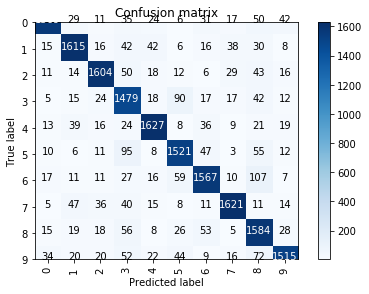

In [191]:
Y_pred_classes30 = np.argmax(Y_pred30,axis = 1) 
# Convert validation observations to one hot vectors
Y_true30 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx30 = confusion_matrix(Y_true30, Y_pred_classes30) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx30, classes = range(10)) 
print(confusion_mtx30)

In [192]:
print(classification_report(Y_true30, Y_pred_classes30, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.89      0.88      0.89      1828
           2       0.91      0.89      0.90      1803
           3       0.78      0.86      0.82      1719
           4       0.90      0.90      0.90      1812
           5       0.85      0.86      0.86      1768
           6       0.87      0.86      0.86      1832
           7       0.92      0.90      0.91      1808
           8       0.79      0.87      0.83      1812
           9       0.91      0.84      0.87      1804

   micro avg       0.87      0.87      0.87     16186
   macro avg       0.87      0.87      0.87     16186
weighted avg       0.87      0.87      0.87     16186



# MODEL31- 
Dense Layers as 684,342,170

Kernel Initiaizer as 'uniform'

activations as 'Relu'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 128 with 100 epoch.

In [193]:
tf.keras.backend.clear_session()
##Initialize the Artificial Neural Network Classifier
keras_model_31 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_31.add(Dense(684,kernel_initializer='uniform',input_shape = (1024, )))
keras_model_31.add(BatchNormalization())
keras_model_31.add(Activation('relu'))
keras_model_31.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_31.add(Dense(342,kernel_initializer='uniform'))
#Adding Activation function
keras_model_31.add(BatchNormalization())
keras_model_31.add(Activation('relu'))
keras_model_31.add(Dropout(0.1))
#Hidden Layer 3
#Adding third Hidden layer
keras_model_31.add(Dense(170,kernel_initializer='uniform'))
#Adding Activation function
keras_model_31.add(BatchNormalization())
keras_model_31.add(Activation('relu'))
keras_model_31.add(Dropout(0.1))
# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_31.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_31.add(Activation('softmax'))

adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_31.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the Training data
history_final_31 = keras_model_31.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 100, verbose = 1)



Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 47s 1ms/step - loss: 1.3310 - accuracy: 0.5595 - val_loss: 1.5396 - val_accuracy: 0.4784
Epoch 2/100
42000/42000 [==============================] - 38s 913us/step - loss: 0.8777 - accuracy: 0.7213 - val_loss: 1.3121 - val_accuracy: 0.5609
Epoch 3/100
42000/42000 [==============================] - 37s 870us/step - loss: 0.7354 - accuracy: 0.7691 - val_loss: 1.0440 - val_accuracy: 0.6516
Epoch 4/100
42000/42000 [==============================] - 37s 885us/step - loss: 0.6563 - accuracy: 0.7940 - val_loss: 1.0045 - val_accuracy: 0.6869
Epoch 5/100
42000/42000 [==============================] - 37s 869us/step - loss: 0.5974 - accuracy: 0.8098 - val_loss: 0.9726 - val_accuracy: 0.6862
Epoch 6/100
42000/42000 [==============================] - 37s 878us/step - loss: 0.5458 - accuracy: 0.8272 - val_loss: 0.7840 - val_accuracy: 0.7531
Epoch 7/100
42000/42000 [===========================

42000/42000 [==============================] - 35s 843us/step - loss: 0.1451 - accuracy: 0.9532 - val_loss: 0.2108 - val_accuracy: 0.9449
Epoch 56/100
42000/42000 [==============================] - 36s 861us/step - loss: 0.1429 - accuracy: 0.9537 - val_loss: 0.2038 - val_accuracy: 0.9477
Epoch 57/100
42000/42000 [==============================] - 36s 852us/step - loss: 0.1371 - accuracy: 0.9559 - val_loss: 0.2055 - val_accuracy: 0.9464
Epoch 58/100
42000/42000 [==============================] - 35s 845us/step - loss: 0.1386 - accuracy: 0.9542 - val_loss: 0.2033 - val_accuracy: 0.9471
Epoch 59/100
42000/42000 [==============================] - 37s 873us/step - loss: 0.1334 - accuracy: 0.9564 - val_loss: 0.2073 - val_accuracy: 0.9472
Epoch 60/100
42000/42000 [==============================] - 37s 875us/step - loss: 0.1318 - accuracy: 0.9567 - val_loss: 0.2565 - val_accuracy: 0.9294
Epoch 61/100
42000/42000 [==============================] - 37s 881us/step - loss: 0.1368 - accuracy: 0.956

In [194]:
results31 = keras_model_31.evaluate(X_test, y_test)
print('Test Accuracy: ', results31[1])

18000/18000 [==============================] - 6s 339us/step
Test Accuracy:  0.8698889017105103


In [195]:
keras_model_31.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 684)               701100    
_________________________________________________________________
batch_normalization_1 (Batch (None, 684)               2736      
_________________________________________________________________
activation_1 (Activation)    (None, 684)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 684)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 342)               234270    
_________________________________________________________________
batch_normalization_2 (Batch (None, 342)               1368      
_________________________________________________________________
activation_2 (Activation)    (None, 342)              

In [196]:
Y_pred31= keras_model_31.predict(X_test)

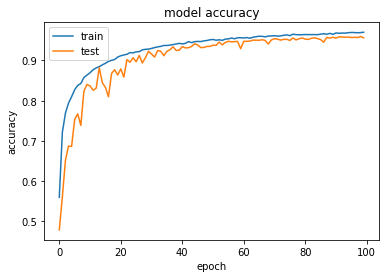

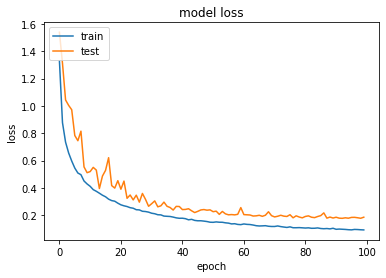

In [207]:
Y_pred31= keras_model_31.predict(X_test)
#summarize history for accuracy
plt.plot(history_final_31.history['accuracy'])
plt.plot(history_final_31.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_31.history['loss'])
plt.plot(history_final_31.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [198]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ dense layer updated '], 'accuracy': [results31[1]]},index={'20'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1621   21    9   30   20   11   23   11   21   47]
 [  21 1607    8   58   50   19   12   23   18   12]
 [  14   27 1537   72   31   16    3   24   31   48]
 [  12   14   12 1488   17   95   20   14   25   22]
 [  14   29   10   27 1645   14   21    3   21   28]
 [   9   12    6   91    8 1549   45    3   25   20]
 [  32   15    8   27   32   73 1564    5   63   13]
 [  15   61   20   52   19   13   11 1588    9   20]
 [  20   31   10   71   12   36   69    4 1515   44]
 [  44   19   11   54   20   48   14   15   35 1544]]


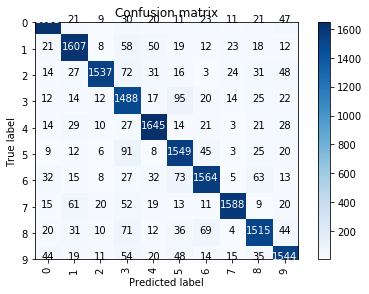

In [208]:
Y_pred_classes31 = np.argmax(Y_pred31,axis = 1) 
# Convert validation observations to one hot vectors
Y_true31 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx31 = confusion_matrix(Y_true31, Y_pred_classes31) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx31, classes = range(10)) 
print(confusion_mtx31)

In [209]:
print(classification_report(Y_true31, Y_pred_classes31, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88      1828
           2       0.94      0.85      0.90      1803
           3       0.76      0.87      0.81      1719
           4       0.89      0.91      0.90      1812
           5       0.83      0.88      0.85      1768
           6       0.88      0.85      0.87      1832
           7       0.94      0.88      0.91      1808
           8       0.86      0.84      0.85      1812
           9       0.86      0.86      0.86      1804

   micro avg       0.87      0.87      0.87     16186
   macro avg       0.87      0.87      0.87     16186
weighted avg       0.87      0.87      0.87     16186



In [202]:
from keras.layers import LeakyReLU

# MODEL32- 
Dense Layers as 952,952

Kernel Initiaizer as 'uniform'

activations as 'LeakyRelu(alpha=.05)'

batch normalisation

dropout as 10 %

optimizer as Adam(Lr updated with other features also)

batch Size as 200 with 100 epoch.

In [203]:

tf.keras.backend.clear_session()
##Initialize the Artificial Neural Network Classifier
keras_model_32 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_32.add(Dense(952,kernel_initializer='uniform',input_shape = (1024, )))
keras_model_32.add(BatchNormalization())
keras_model_32.add(LeakyReLU(alpha=0.05))
keras_model_32.add(Dropout(0.1))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_32.add(Dense(952,kernel_initializer='uniform'))
#Adding Activation function
keras_model_32.add(BatchNormalization())
keras_model_32.add(LeakyReLU(alpha=0.05))
keras_model_32.add(Dropout(0.1))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_32.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_32.add(Activation('softmax'))

adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_32.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the Training data
history_final_32 = keras_model_32.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


 

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 51s 1ms/step - loss: 1.5287 - accuracy: 0.5017 - val_loss: 1.6249 - val_accuracy: 0.4518
Epoch 2/100
42000/42000 [==============================] - 45s 1ms/step - loss: 1.0115 - accuracy: 0.6794 - val_loss: 1.5141 - val_accuracy: 0.5125
Epoch 3/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.8450 - accuracy: 0.7393 - val_loss: 1.1435 - val_accuracy: 0.6290
Epoch 4/100
42000/42000 [==============================] - 45s 1ms/step - loss: 0.7510 - accuracy: 0.7672 - val_loss: 0.9168 - val_accuracy: 0.7014
Epoch 5/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.6938 - accuracy: 0.7859 - val_loss: 0.8994 - val_accuracy: 0.6990
Epoch 6/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.6458 - accuracy: 0.8014 - val_loss: 0.7196 - val_accuracy: 0.7720
Epoch 7/100
42000/42000 [==============================] - 44s

Epoch 56/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2289 - accuracy: 0.9271 - val_loss: 0.3376 - val_accuracy: 0.8986
Epoch 57/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2299 - accuracy: 0.9263 - val_loss: 0.2585 - val_accuracy: 0.9293
Epoch 58/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2232 - accuracy: 0.9300 - val_loss: 0.2882 - val_accuracy: 0.9212
Epoch 59/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2243 - accuracy: 0.9286 - val_loss: 0.2687 - val_accuracy: 0.9255
Epoch 60/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2211 - accuracy: 0.9287 - val_loss: 0.2755 - val_accuracy: 0.9234
Epoch 61/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2180 - accuracy: 0.9303 - val_loss: 0.2694 - val_accuracy: 0.9238
Epoch 62/100
42000/42000 [==============================] - 43s 1ms/step - loss: 0.2127 - accuracy: 0.9305

In [204]:
keras_model_32.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 952)               975800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 952)               3808      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 952)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 952)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 952)               907256    
_________________________________________________________________
batch_normalization_2 (Batch (None, 952)               3808      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 952)              

In [205]:
Y_pred32= keras_model_32.predict(X_test)

In [206]:
results32 = keras_model_32.evaluate(X_test, y_test)
print('Test Accuracy: ', results32[1])

18000/18000 [==============================] - 7s 404us/step
Test Accuracy:  0.8736666440963745


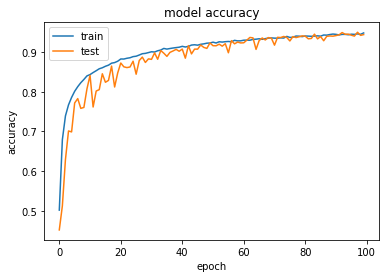

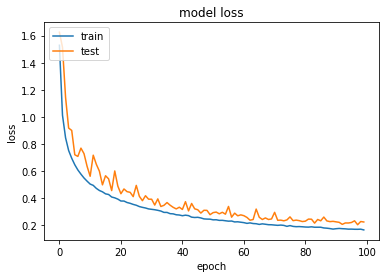

In [210]:

#summarize history for accuracy
plt.plot(history_final_32.history['accuracy'])
plt.plot(history_final_32.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_32.history['loss'])
plt.plot(history_final_32.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [211]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ dense layer updated '], 'accuracy': [results32[1]]},index={'21'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1527   24   27   24   41    7   41   12   75   36]
 [   5 1565   27   36   93    9   17   39   33    4]
 [   4   11 1620   29   37    6    5   36   38   17]
 [   4   13   32 1467   22   81   14   24   52   10]
 [   3   20    9   10 1703    5   18   11   23   10]
 [   4    9   13   69   16 1534   51    7   50   15]
 [  11   10   10   20   43   54 1547   10  119    8]
 [   4   36   29   17   32    7    6 1648   21    8]
 [   8   19   17   30   22   17   38   10 1626   25]
 [  23   17   28   48   36   45   10   24   84 1489]]


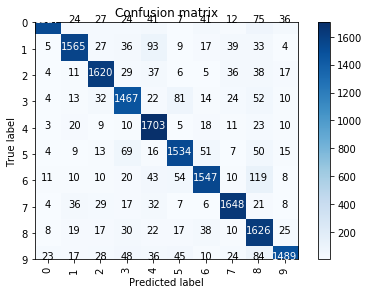

In [212]:
Y_pred_classes32 = np.argmax(Y_pred32,axis = 1) 
# Convert validation observations to one hot vectors
Y_true32 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx32 = confusion_matrix(Y_true32, Y_pred_classes32) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx32, classes = range(10)) 
print(confusion_mtx32)

In [213]:
print(classification_report(Y_true32, Y_pred_classes32, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.91      0.86      0.88      1828
           2       0.89      0.90      0.90      1803
           3       0.84      0.85      0.85      1719
           4       0.83      0.94      0.88      1812
           5       0.87      0.87      0.87      1768
           6       0.89      0.84      0.86      1832
           7       0.90      0.91      0.91      1808
           8       0.77      0.90      0.83      1812
           9       0.92      0.83      0.87      1804

   micro avg       0.87      0.88      0.87     16186
   macro avg       0.87      0.88      0.87     16186
weighted avg       0.87      0.88      0.87     16186



# MODEL33- 
Dense Layers as 952,952

Kernel Initiaizer as 'uniform'

activations as 'LeakyRelu(alpha=.05)'

batch normalisation

dropout as 30 %

optimizer as Adam(Lr updated with other features also)

batch Size as 200 with 100 epoch.

In [215]:

tf.keras.backend.clear_session()
##Initialize the Artificial Neural Network Classifier
keras_model_33 = Sequential()
#Adding Input layer and activation functions ReLU
keras_model_33.add(Dense(952,kernel_initializer='he_normal',input_shape = (1024, )))
keras_model_33.add(BatchNormalization())
keras_model_33.add(LeakyReLU(alpha=0.05))
keras_model_33.add(Dropout(0.3))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_33.add(Dense(952,kernel_initializer='he_normal'))
#Adding Activation function
keras_model_33.add(BatchNormalization())
keras_model_33.add(LeakyReLU(alpha=0.05))
keras_model_33.add(Dropout(0.3))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_33.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_33.add(Activation('softmax'))

adam = optimizers.adam(lr = 0.001,beta_2=0.999, decay=0.001, amsgrad=False)
# compiling the ANN classifier
keras_model_33.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the Training data
history_final_33 = keras_model_33.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


 

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 48s 1ms/step - loss: 1.5293 - accuracy: 0.4981 - val_loss: 1.5262 - val_accuracy: 0.4936
Epoch 2/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.9912 - accuracy: 0.6848 - val_loss: 1.1453 - val_accuracy: 0.6215
Epoch 3/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.8469 - accuracy: 0.7353 - val_loss: 1.1424 - val_accuracy: 0.6302
Epoch 4/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.7554 - accuracy: 0.7679 - val_loss: 0.8889 - val_accuracy: 0.7226
Epoch 5/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.6965 - accuracy: 0.7817 - val_loss: 1.0105 - val_accuracy: 0.6876
Epoch 6/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.6447 - accuracy: 0.8022 - val_loss: 0.7580 - val_accuracy: 0.7631
Epoch 7/100
42000/42000 [==============================] - 44s

Epoch 56/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2462 - accuracy: 0.9214 - val_loss: 0.2790 - val_accuracy: 0.9233
Epoch 57/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2434 - accuracy: 0.9220 - val_loss: 0.2773 - val_accuracy: 0.9247
Epoch 58/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2400 - accuracy: 0.9236 - val_loss: 0.2849 - val_accuracy: 0.9186
Epoch 59/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2400 - accuracy: 0.9233 - val_loss: 0.2657 - val_accuracy: 0.9260
Epoch 60/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2367 - accuracy: 0.9255 - val_loss: 0.2627 - val_accuracy: 0.9282
Epoch 61/100
42000/42000 [==============================] - 45s 1ms/step - loss: 0.2349 - accuracy: 0.9242 - val_loss: 0.2801 - val_accuracy: 0.9217
Epoch 62/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.2346 - accuracy: 0.9253

In [216]:
results33 = keras_model_33.evaluate(X_test, y_test)
print('Test Accuracy: ', results33[1])

18000/18000 [==============================] - 7s 412us/step
Test Accuracy:  0.8744444251060486


In [217]:
Y_pred33= keras_model_33.predict(X_test)

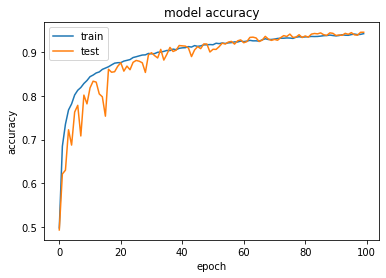

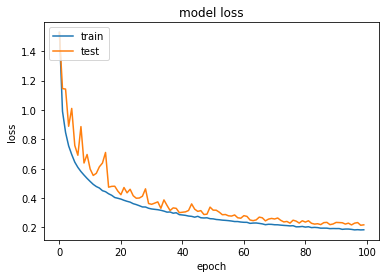

In [218]:

#summarize history for accuracy
plt.plot(history_final_33.history['accuracy'])
plt.plot(history_final_33.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final_33.history['loss'])
plt.plot(history_final_33.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()




In [219]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf1 = pd.DataFrame({'Method':['NN_ dropout updated_ '], 'accuracy': [results33[1]]},index={'22'})
results_on_vali= pd.concat([results_on_vali, tempResultsDf1])
results_on_vali = results_on_vali[['Method', 'accuracy']]
results_on_vali

,Method,accuracy
1,NN_SGD,0.815278
2,NN_Batch_adam,0.095500
3,NN_Batch_dense layer updated,0.830056
4,NN_Batch_Dense updated,0.787667
5,NN_Batch_Adam_dense layer updated,0.842556
6,NN_Batch_Adam_LR dropout updated,0.848444
7,NN_Batch_Adam_4 hidden layers,0.832111
8,NN_Batch_Adam_dense updated,0.829778
9,NN_Batch_Adam_batch and no normalisation,0.821667
10,NN_Batch_RMSprop,0.810167


[[1636   25    6   19    8    3   37   14   33   33]
 [  21 1619   18   32   21    7   21   41   36   12]
 [  11   16 1605   35    8    7    9   37   46   29]
 [   8   20   29 1456    4   56   29   28   66   23]
 [  19   39   25   35 1548    6   43   13   47   37]
 [  11   11   12   78    3 1487   64   13   58   31]
 [  32   16    8   23   12   41 1600   11   81    8]
 [  13   39   22   19    6    7   10 1658   17   17]
 [  18   28   12   45    3   13   64    9 1578   42]
 [  41   19   19   37    8   36   13   19   59 1553]]


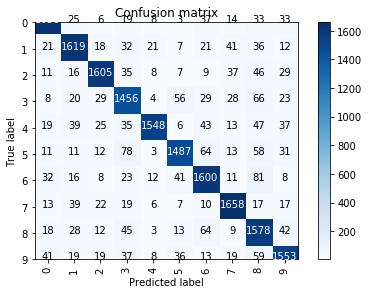

In [220]:
Y_pred_classes33 = np.argmax(Y_pred33,axis = 1) 
# Convert validation observations to one hot vectors
Y_true33 = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx33 = confusion_matrix(Y_true33, Y_pred_classes33) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx33, classes = range(10)) 
print(confusion_mtx33)

In [221]:
print(classification_report(Y_true33, Y_pred_classes33, labels=[1, 2, 3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88      1828
           2       0.91      0.89      0.90      1803
           3       0.82      0.85      0.83      1719
           4       0.95      0.85      0.90      1812
           5       0.89      0.84      0.87      1768
           6       0.85      0.87      0.86      1832
           7       0.90      0.92      0.91      1808
           8       0.78      0.87      0.82      1812
           9       0.87      0.86      0.87      1804

   micro avg       0.87      0.87      0.87     16186
   macro avg       0.87      0.87      0.87     16186
weighted avg       0.87      0.87      0.87     16186



# ANALYSIS:


In this kernel, we have trained a Artificial Neural Network to recognize the digits in the Street View House Numbers dataset (Format 2). In particular, we have performed some minimal preprocessing of the data, we have augmented the data in various ways, we have created an auxillary model in order to find which learning rate we should choose for our optimizer and, we have trained the ANN and evaluated it on the test images data. Furthermore, we have provided two useful visualizations (confusion matrix and feature maps) so as get a sense of how our model actually works and not view it as just a black-box process. Finally, it should be noted that there is quite a bit of room for tuning and different architectures so as to improve the accuracy of the model; nonetheless, our results are pretty good given the simplicity of our approach.

I hope you enjoyed this simple kernel and find it useful.

# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics
KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
Using NN with batchNormalization we got 87% accuracy. We have predicted the classification of the images correctly with 87 % accuracy